In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("owid-covid-data.xlsx")
data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511    41128772   
1            64.83                    0.511    41128772   
2            64.83                    0.511    41128772   
3            64.83                    0.511    41128772   
4            64.83                    0.511    41128772   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [3]:
data.shape

(342947, 67)

## Choosing 10 Countries

In [4]:
#code that filters out European countries
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]

# subset for European countries
europe_data = data[data['location'].isin(european_countries)]
europe_data.head()


iso_code continent location        date  total_cases  new_cases  \
2714      ALB    Europe  Albania  2020-01-03          NaN        0.0   
2715      ALB    Europe  Albania  2020-01-04          NaN        0.0   
2716      ALB    Europe  Albania  2020-01-05          NaN        0.0   
2717      ALB    Europe  Albania  2020-01-06          NaN        0.0   
2718      ALB    Europe  Albania  2020-01-07          NaN        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
2714                 NaN           NaN         0.0                  NaN  ...   
2715                 NaN           NaN         0.0                  NaN  ...   
2716                 NaN           NaN         0.0                  NaN  ...   
2717                 NaN           NaN         0.0                  NaN  ...   
2718                 NaN           NaN         0.0                  NaN  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
2714          51.2                     NaN                        2.89   
2715          51.2                     NaN                        2.89   
2716          51.2                     NaN                        2.89   
2717          51.2                     NaN                        2.89   
2718          51.2                     NaN                        2.89   

      life_expectancy  human_development_index  population  \
2714            78.57                    0.795     2842318   
2715            78.57                    0.795     2842318   
2716            78.57                    0.795     2842318   
2717            78.57                    0.795     2842318   
2718            78.57                    0.795     2842318   

      excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
2714                                   NaN                          NaN   
2715                                   NaN                          NaN   
2716                                   NaN                          NaN   
2717                                   NaN                          NaN   
2718                                   NaN                          NaN   

      excess_mortality  excess_mortality_cumulative_per_million  
2714               NaN                                      NaN  
2715               NaN                                      NaN  
2716               NaN                                      NaN  
2717               NaN                                      NaN  
2718               NaN                                      NaN  

[5 rows x 67 columns]

In [5]:
# create a table that shows the number of features with more than 30% missing values for each country
def missing_features_by_country(df):

    missingness = df.groupby('location').apply(lambda group: group.isna().mean() * 100)
    
    # Count the number of features with more than 30% missing values for each country
    features_missing_40 = (missingness > 40).sum(axis=1)
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Country': features_missing_40.index,
        'Features with >40% Missingness': features_missing_40.values
    })
    
    return summary.sort_values(by='Features with >40% Missingness', ascending=True)

# Calculate and display the results
missing_features_summary = missing_features_by_country(europe_data)
print(missing_features_summary)

                   Country  Features with >40% Missingness
21                   Italy                               7
6                  Belgium                               9
12                 Estonia                              11
43                   Spain                              14
26               Lithuania                              14
14                  France                              15
11                 Denmark                              16
20                 Ireland                              16
27              Luxembourg                              18
45             Switzerland                              19
17                  Greece                              19
35                  Poland                              21
36                Portugal                              22
16                 Germany                              22
41                Slovakia                              22
13                 Finland                              

In [6]:
# check for overall missingness
missing_values_by_location = europe_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
columns_to_exclude = ["iso_code", "continent", "location", "date"]
missing_values_df['sum_missing'] = missing_values_df.drop(columns=columns_to_exclude).sum(axis=1)
missing_total_by_location = missing_values_df[['location', 'sum_missing']]
missing_total_by_location = missing_total_by_location.sort_values(by='sum_missing', ascending=True)
missing_total_by_location.head(20)

location  sum_missing
location                             
Italy                  0        18094
Belgium                0        20668
France                 0        21166
Estonia                0        23902
Switzerland            0        25625
Spain                  0        25661
Lithuania              0        26176
Luxembourg             0        26640
Ireland                0        27108
United Kingdom         0        27423
Denmark                0        27731
Greece                 0        28153
Germany                0        29076
Slovenia               0        29498
Norway                 0        29589
Netherlands            0        30697
Croatia                0        30799
Malta                  0        31261
Austria                0        31545
Latvia                 0        31645

In [7]:
# confirm that countries reported weekly
france_data_subset = data[data['location'] == "France"]
france_data_subset['date'] = pd.to_datetime(france_data_subset['date'])
france_data_subset = france_data_subset[(france_data_subset['date'] >= '2022-09-01') & (france_data_subset['date'] <= '2022-10-01')]
france_data_subset = france_data_subset[['date', 'new_cases']]
france_data_subset.head(15)


/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_65403/3868728319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data_subset['date'] = pd.to_datetime(france_data_subset['date'])


date  new_cases
103999 2022-09-01        0.0
104000 2022-09-02        0.0
104001 2022-09-03        0.0
104002 2022-09-04   106571.0
104003 2022-09-05        0.0
104004 2022-09-06        0.0
104005 2022-09-07        0.0
104006 2022-09-08        0.0
104007 2022-09-09        0.0
104008 2022-09-10        0.0
104009 2022-09-11   112374.0
104010 2022-09-12        0.0
104011 2022-09-13        0.0
104012 2022-09-14        0.0
104013 2022-09-15        0.0

In [8]:
# identify countries that reported daily
non_zero_cases = europe_data[europe_data['new_cases'] > 0]
non_zero_counts = non_zero_cases.groupby('location')['new_cases'].count()
non_zero_counts.sort_values(ascending=False)

location
United Kingdom            1310
Italy                     1302
Belgium                   1292
Poland                    1285
Lithuania                 1269
Finland                   1266
Ireland                   1250
Norway                    1222
Austria                   1220
Denmark                   1216
Serbia                    1207
Azerbaijan                1200
Russia                    1177
Bosnia and Herzegovina    1160
Georgia                   1156
Slovakia                  1148
Kazakhstan                1141
Sweden                    1138
Kosovo                    1134
Albania                   1125
Croatia                   1100
Switzerland               1091
Romania                   1013
Monaco                     969
San Marino                 928
Liechtenstein              877
Armenia                    876
Moldova                    840
Turkey                     832
Cyprus                     788
Belarus                    768
Hungary                    747

In [9]:
# pick countries that have relatively low missingness
country_list = [
    'United Kingdom', 'Italy', 'Belgium', 'Poland','Lithuania',
    'Finland', 'Ireland', 'Norway', 'Denmark','Switzerland'
    # 'Spain', 'France', 'Germany', 'Ireland', 'United Kingdom',
    # 'Italy', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'
]
selected_data = europe_data[europe_data['location'].isin(country_list)]
selected_data.head()

iso_code continent location        date  total_cases  new_cases  \
28497      BEL    Europe  Belgium  2020-01-03          NaN        0.0   
28498      BEL    Europe  Belgium  2020-01-04          NaN        0.0   
28499      BEL    Europe  Belgium  2020-01-05          NaN        0.0   
28500      BEL    Europe  Belgium  2020-01-06          NaN        0.0   
28501      BEL    Europe  Belgium  2020-01-07          NaN        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
28497                 NaN           NaN         0.0                  NaN  ...   
28498                 NaN           NaN         0.0                  NaN  ...   
28499                 NaN           NaN         0.0                  NaN  ...   
28500                 NaN           NaN         0.0                  NaN  ...   
28501                 NaN           NaN         0.0                  NaN  ...   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
28497          31.4                     NaN                        5.64   
28498          31.4                     NaN                        5.64   
28499          31.4                     NaN                        5.64   
28500          31.4                     NaN                        5.64   
28501          31.4                     NaN                        5.64   

       life_expectancy  human_development_index  population  \
28497            81.63                    0.931    11655923   
28498            81.63                    0.931    11655923   
28499            81.63                    0.931    11655923   
28500            81.63                    0.931    11655923   
28501            81.63                    0.931    11655923   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
28497                                   NaN                          NaN   
28498                                   NaN                          NaN   
28499                                -151.3                        -6.34   
28500                                   NaN                          NaN   
28501                                   NaN                          NaN   

       excess_mortality  excess_mortality_cumulative_per_million  
28497               NaN                                      NaN  
28498               NaN                                      NaN  
28499             -6.34                               -13.086293  
28500               NaN                                      NaN  
28501               NaN                                      NaN  

[5 rows x 67 columns]

In [10]:
selected_data.shape

(13570, 67)

## Data Cleaning

### Missing values in target variable

In [11]:
# make sure the countries report daily
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
non_zero_cases.groupby('location')['new_cases'].count()

location
Belgium           1292
Denmark           1216
Finland           1266
Ireland           1250
Italy             1302
Lithuania         1269
Norway            1222
Poland            1285
Switzerland       1091
United Kingdom    1310
Name: new_cases, dtype: int64

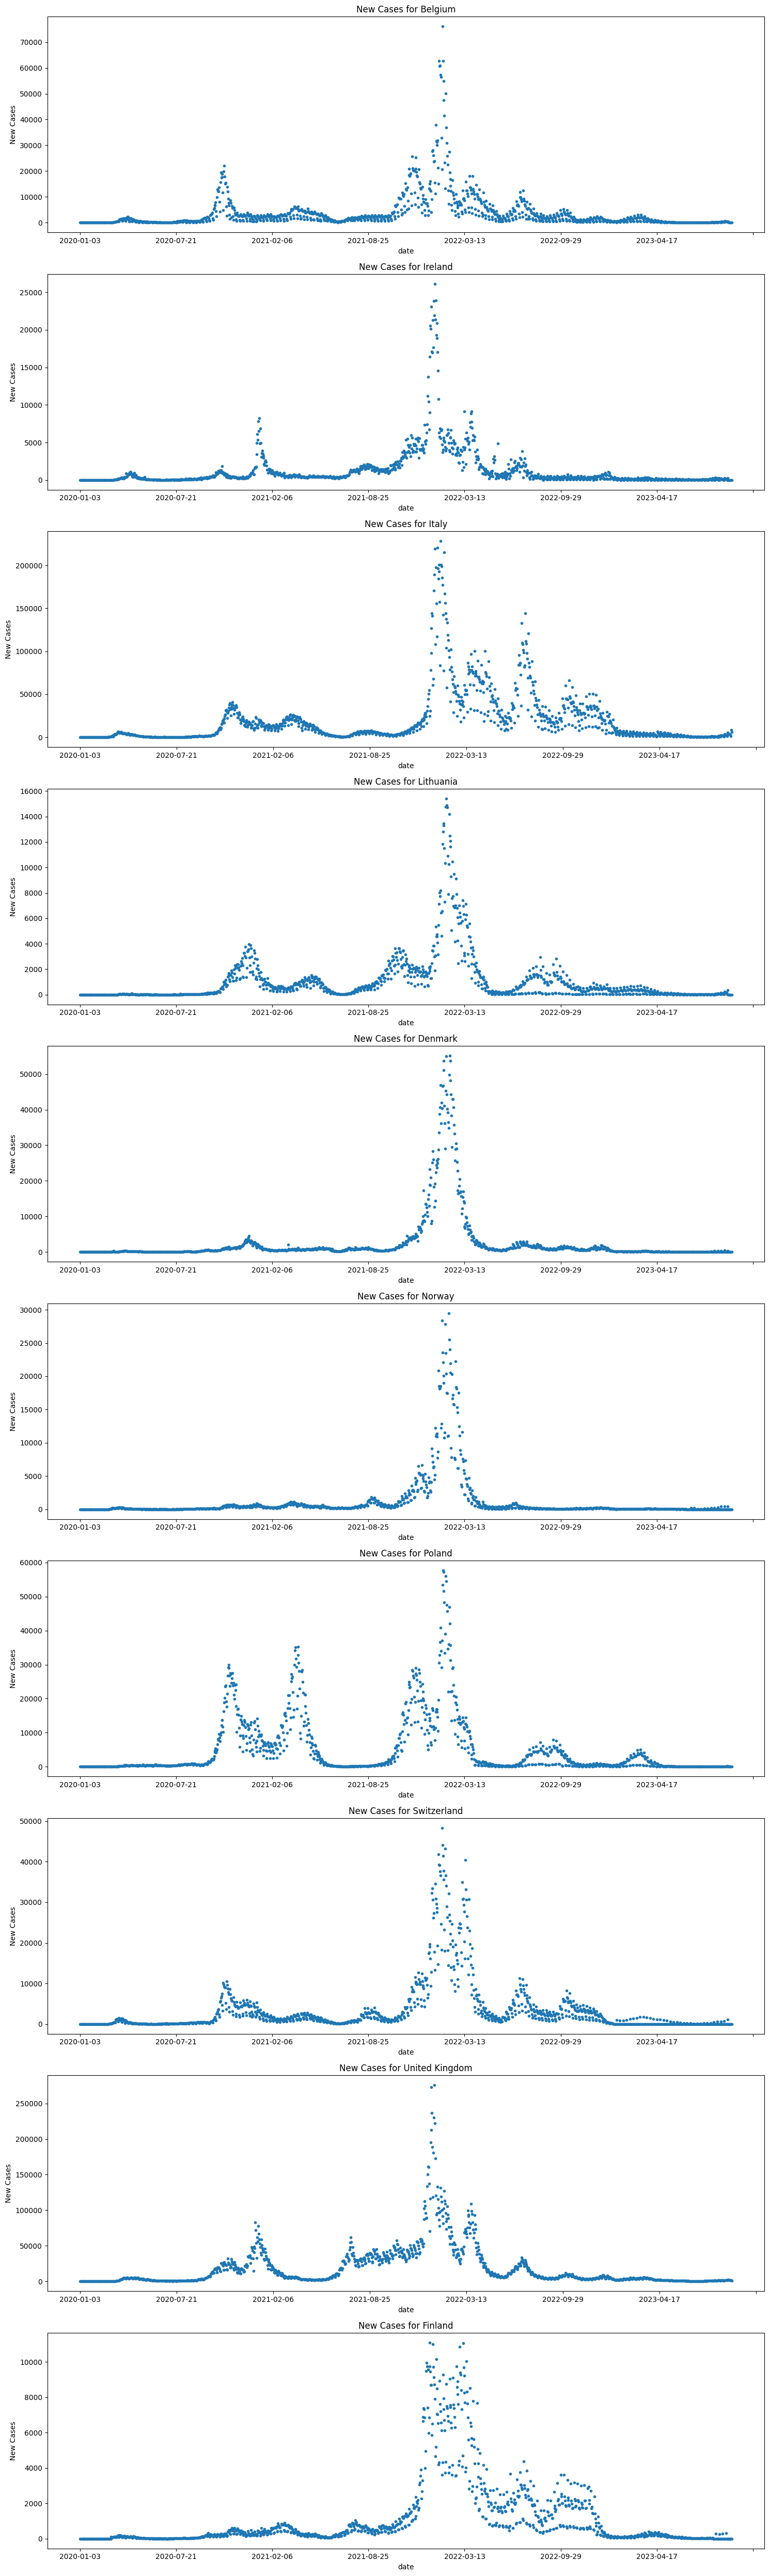

In [12]:
selected_data_visual = selected_data.copy()
selected_data_visual.set_index('date', inplace=True)
selected_data_visual.sort_index(inplace=True)
locations = selected_data_visual['location'].unique()

plt.figure(figsize=(15, 5 * len(locations)))

for i, location in enumerate(locations, 1):
    plt.subplot(len(locations), 1, i)
    selected_data_visual[selected_data_visual['location'] == location]['new_cases'].plot(style='.', title=f'New Cases for {location}')
    plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

In [13]:
# figure out when does each country start reporting data
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
first_non_zero_case_date = non_zero_cases.groupby('location')['date'].min()
first_non_zero_case_date

location
Belgium           2020-02-05
Denmark           2020-02-28
Finland           2020-01-04
Ireland           2020-03-02
Italy             2020-01-31
Lithuania         2020-03-21
Norway            2020-02-22
Poland            2020-03-05
Switzerland       2020-02-25
United Kingdom    2020-02-01
Name: date, dtype: object

In [14]:
selected_data['date'] = pd.to_datetime(selected_data['date'])
selected_data = selected_data[selected_data['date'] >= pd.Timestamp('2020-03-21')]
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
first_non_zero_case_date = non_zero_cases.groupby('location')['date'].min()
first_non_zero_case_date

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_65403/3993552312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['date'] = pd.to_datetime(selected_data['date'])


location
Belgium          2020-03-21
Denmark          2020-03-21
Finland          2020-03-21
Ireland          2020-03-21
Italy            2020-03-21
Lithuania        2020-03-21
Norway           2020-03-21
Poland           2020-03-21
Switzerland      2020-03-21
United Kingdom   2020-03-21
Name: date, dtype: datetime64[ns]

In [15]:
last_non_zero_case_date = non_zero_cases.groupby('location')['date'].max()
last_non_zero_case_date

location
Belgium          2023-09-14
Denmark          2023-09-12
Finland          2023-09-08
Ireland          2023-09-12
Italy            2023-09-14
Lithuania        2023-09-12
Norway           2023-09-12
Poland           2023-09-12
Switzerland      2023-09-11
United Kingdom   2023-09-14
Name: date, dtype: datetime64[ns]

In [16]:
selected_data = selected_data[selected_data['date'] <= pd.Timestamp('2023-01-14')]
non_zero_cases = selected_data[selected_data['new_cases'] > 0]
last_non_zero_case_date = non_zero_cases.groupby('location')['date'].max()
last_non_zero_case_date

location
Belgium          2023-01-14
Denmark          2023-01-14
Finland          2023-01-14
Ireland          2023-01-14
Italy            2023-01-14
Lithuania        2023-01-14
Norway           2023-01-14
Poland           2023-01-14
Switzerland      2023-01-14
United Kingdom   2023-01-14
Name: date, dtype: datetime64[ns]

In [17]:
selected_data.shape

(10300, 67)

In [18]:
# check for 0s
zero_cases = selected_data[selected_data['new_cases'] < 0]
zero_cases.groupby('location')['new_cases'].count()

Series([], Name: new_cases, dtype: int64)

### Missingness in regressors

In [19]:
# check for missingness by country
missing_values_by_location = selected_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
missing_values_df.to_csv('missing_values.csv')

In [20]:
# #data missingness
# missing_data = selected_data.isnull().sum()
# threshold = 0.4 * len(selected_data)
# missing_data = missing_data[missing_data < threshold]
# missing_data

In [21]:
# drop features with >40% missingness
threshold = 0.6 * len(selected_data)
data_clean = selected_data.dropna(thresh=threshold, axis=1)
data_clean.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extrem

In [22]:
# remove irrelant columns
data_clean = data_clean.drop(['iso_code','continent'], axis=1)

### Test train split

In [23]:
# test train split
split_date = '2023-01-01'
train = data_clean[data_clean['date'] < split_date]
test = data_clean[data_clean['date'] >= split_date]
# Check the shapes of the train and test sets
print(f"Train Data Shape: {train.shape}")
print(f"Test Data Shape: {test.shape}")

Train Data Shape: (10160, 47)
Test Data Shape: (140, 47)


### Multi-Collinearity

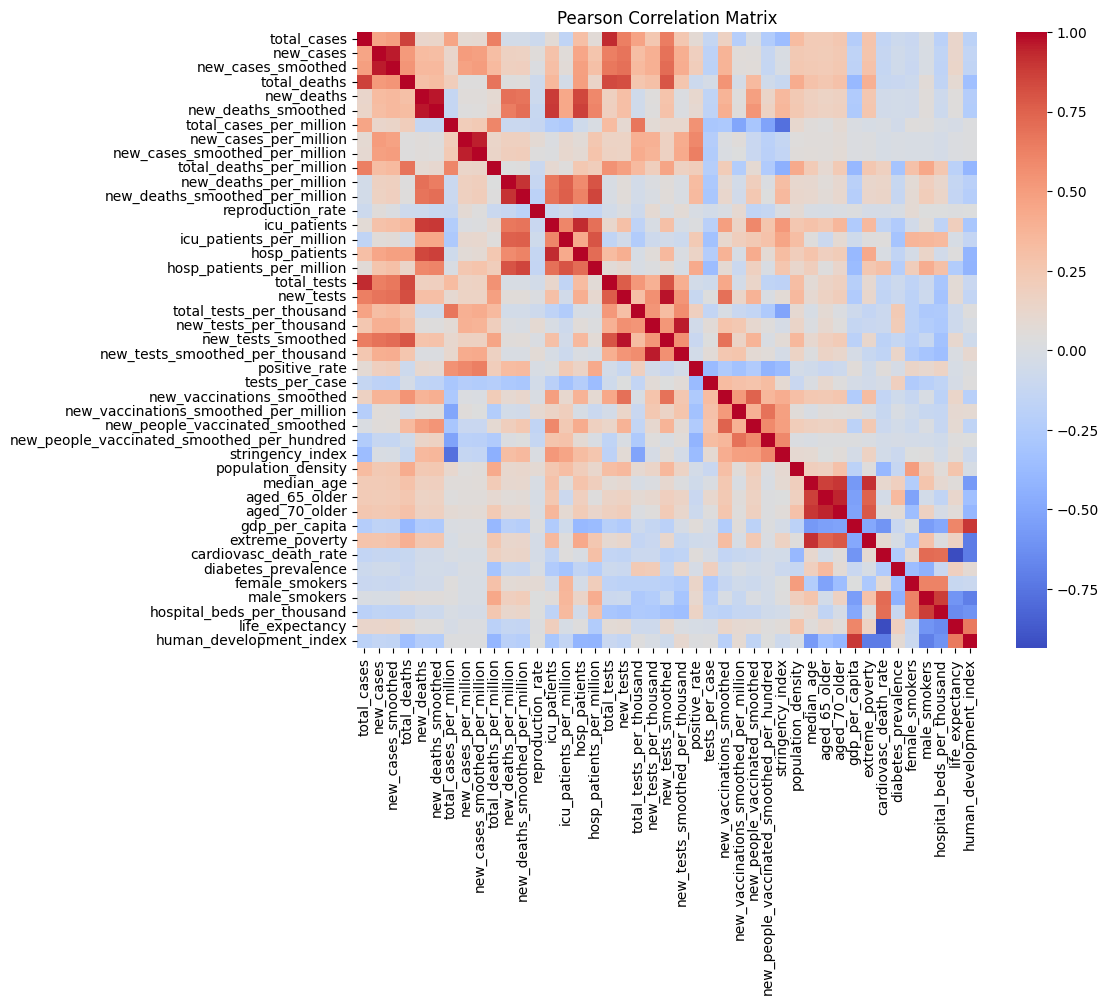

In [24]:
# use Pearson and Spearman correaltion matrix to determine multicollinearity 
train_corr = train.select_dtypes(include=['float64'])
pearson_corr = train_corr.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

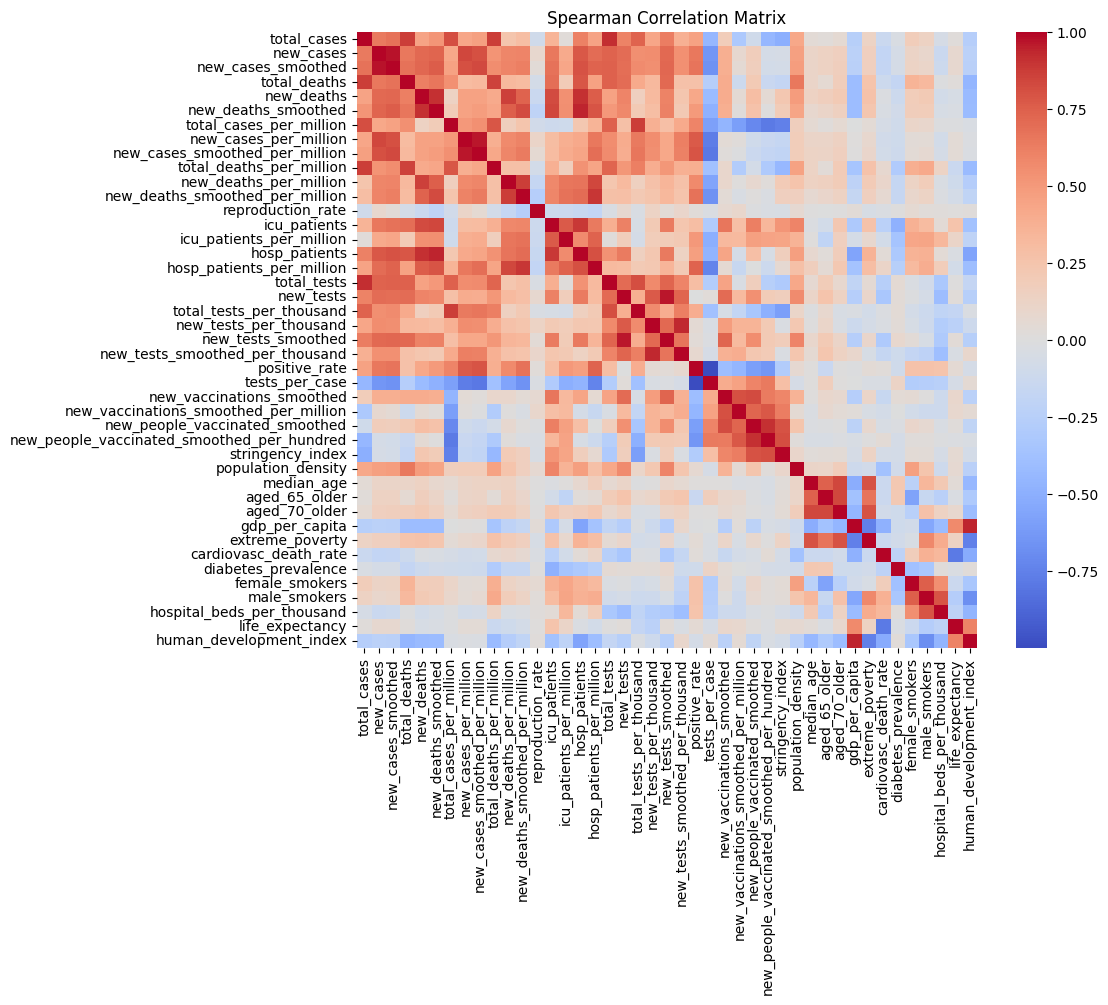

In [25]:
spearman_corr = train_corr.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, fmt=".2f", cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [26]:
# multicollinearity comes from per_hundred, per_million
train = train.loc[:, ~train.columns.str.contains('per_hundred|per_thousand|per_million|total|smoothed')]
train.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'reproduction_rate',
       'icu_patients', 'hosp_patients', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'life_expectancy', 'human_development_index', 'population'],
      dtype='object')

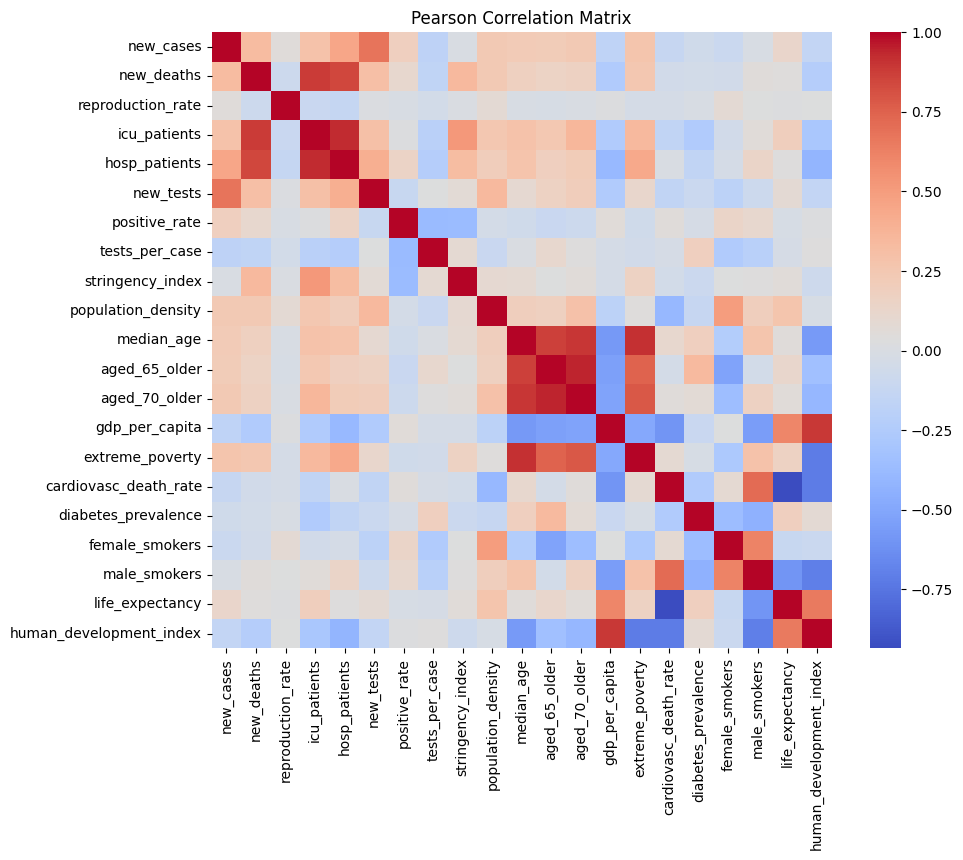

In [27]:
train_corr = train.select_dtypes(include=['float64'])
pearson_corr = train_corr.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

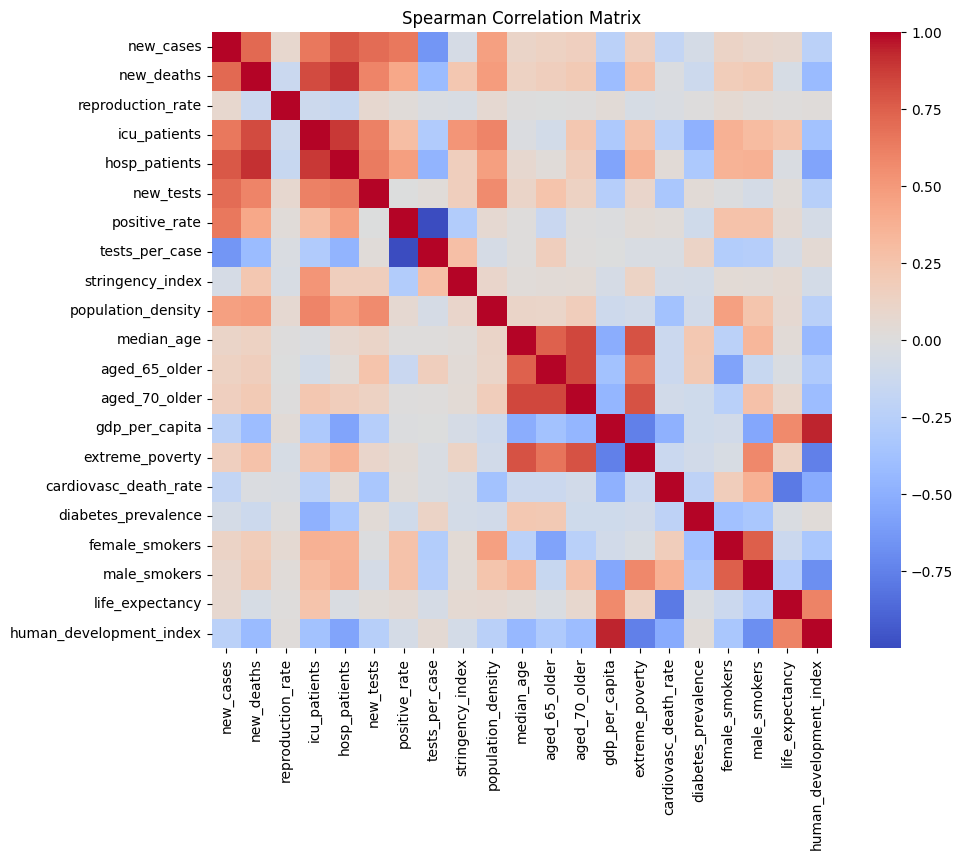

In [28]:
spearman_corr = train_corr.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, fmt=".2f", cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [29]:
# median_age, aged_65_older are highly correlated with aged_70_older 
# gdp_per_capita and extreme_poverty also highly correlated with human_development_index 
# positive_rate and tests_per_case with new_tests
# icu_patients and hosp_patients with new_deaths
# cardiovasc_rate with human_development_index and life_expectancy
train = train.drop(['median_age', 'aged_65_older', 'gdp_per_capita', 'positive_rate', 
                    'male_smokers','icu_patients', 'tests_per_case', 'extreme_poverty',
                    'hosp_patients', 'cardiovasc_death_rate'], axis=1)

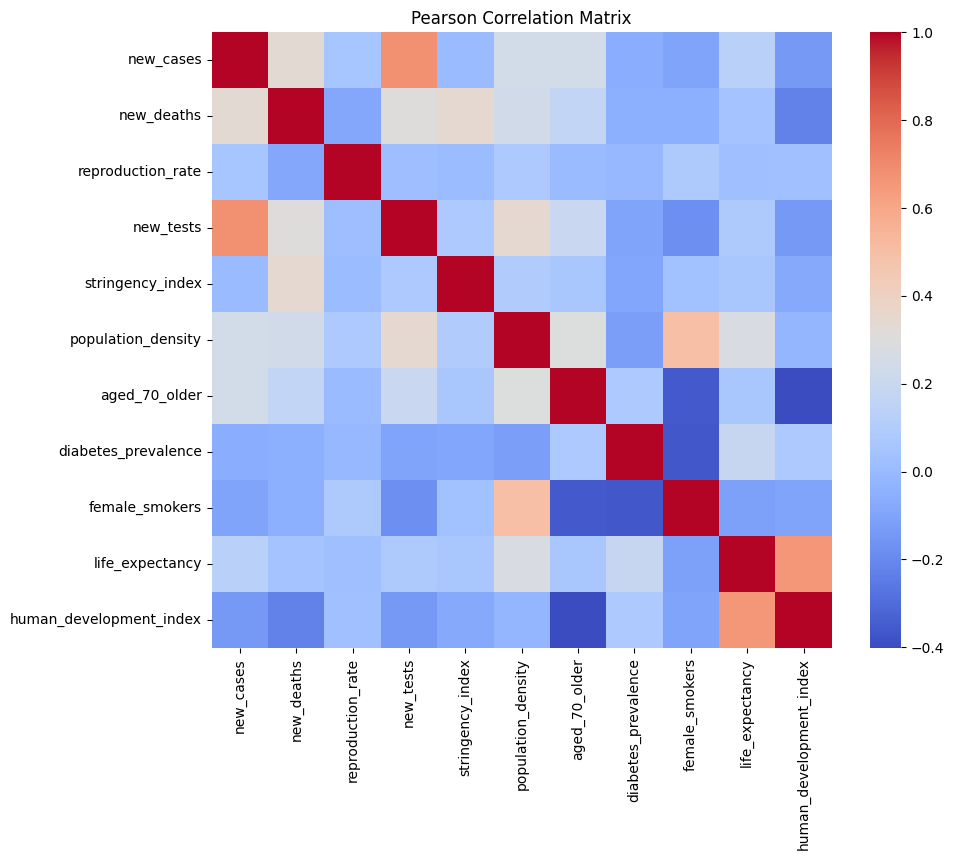

In [30]:
# now correlation values are between 0.4 and -0.4
train_corr = train.select_dtypes(include=['float64'])
pearson_corr = train_corr.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

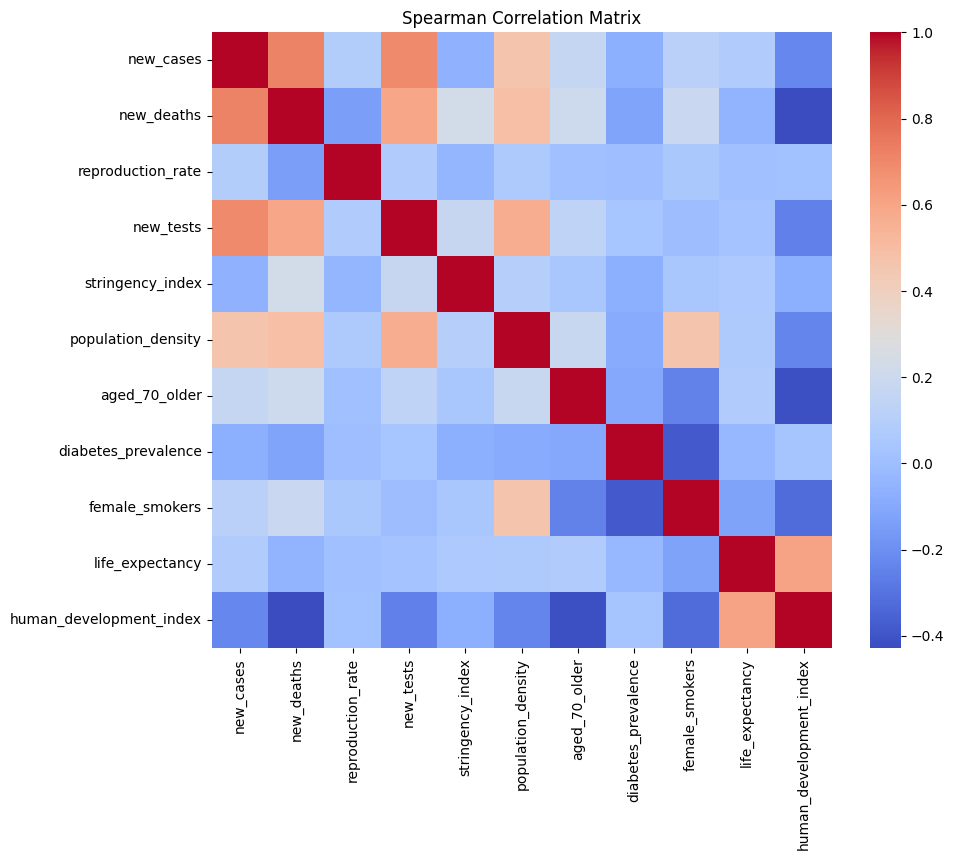

In [31]:
spearman_corr = train_corr.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, fmt=".2f", cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [32]:
# drop same cols for test
test = test.loc[:, ~test.columns.str.contains('per_hundred|per_thousand|per_million|total|smoothed')]
test = test.drop(['median_age', 'aged_65_older', 'gdp_per_capita', 'positive_rate', 
                    'male_smokers','icu_patients', 'tests_per_case', 'extreme_poverty',
                    'hosp_patients', 'cardiovasc_death_rate'], axis=1)

In [33]:
train.dtypes

location                           object
date                       datetime64[ns]
new_cases                         float64
new_deaths                        float64
reproduction_rate                 float64
new_tests                         float64
tests_units                        object
stringency_index                  float64
population_density                float64
aged_70_older                     float64
diabetes_prevalence               float64
female_smokers                    float64
life_expectancy                   float64
human_development_index           float64
population                          int64
dtype: object

In [34]:
# drop test_units as it says 'performed'
train = train.drop(['tests_units'], axis=1)
test = test.drop(['tests_units'], axis=1)

In [35]:
# Check the shapes of the train and test sets
print(f"Train Data Shape: {train.shape}")
print(f"Test Data Shape: {test.shape}")

Train Data Shape: (10160, 14)
Test Data Shape: (140, 14)


## Time Features

In [36]:
import holidays
import datetime
def check_holiday(row):
    country = row['location']
    date = row['date']

    country_holidays = {
        'United Kingdom': holidays.UnitedKingdom(),
        'Italy': holidays.Italy(),
        'Belgium': holidays.Belgium(),
        'Poland': holidays.Poland(),
        'Lithuania': holidays.Lithuania(),
        'Finland': holidays.Finland(),
        'Ireland': holidays.Ireland(),
        'Norway': holidays.Norway(),
        'Denmark': holidays.Denmark(),
        'Switzerland': holidays.Switzerland()
    }

    if country in country_holidays and (date in country_holidays[country] or date + datetime.timedelta(days=1) in country_holidays[country]):
        return 1
    else:
        return 0

train['holidays'] = train.apply(check_holiday, axis=1)
train['holidays'].describe()

count    10160.000000
mean         0.058071
std          0.233889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holidays, dtype: float64

In [37]:
# season
train['season'] = train['date'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or 
                                      x.month == 2 else 'Spring' if  x.month == 3 or 
                                      x.month == 4 or x.month == 5 else 'Summer' if  
                                      x.month == 6 or x.month == 7 or 
                                      x.month == 8 else 'Autumn' if  
                                      x.month == 9 or x.month == 10 or x.month == 11 else '')
# data time features
train.set_index('date', inplace=True)
train['day_of_week'] = train.index.dayofweek
# 0 refers to Monday and 6 to Sunday, we want to tell if the date is weekend or not
train['weekend'] = np.where(train['day_of_week'].isin([5, 6]), 1, 0)
train['month'] = train.index.month
train['year'] = train.index.year
train['quarter'] = train.index.quarter
train['dayofyear'] = train.index.dayofyear
train['dayofmonth'] = train.index.day
train['weekofyear'] = train.index.isocalendar().week.astype(np.int64)
train.reset_index(inplace=True)

In [38]:
# same thing for test
test['holidays'] = test.apply(check_holiday, axis=1)
# season
test['season'] = test['date'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or 
                                      x.month == 2 else 'Spring' if  x.month == 3 or 
                                      x.month == 4 or x.month == 5 else 'Summer' if  
                                      x.month == 6 or x.month == 7 or 
                                      x.month == 8 else 'Autumn' if  
                                      x.month == 9 or x.month == 10 or x.month == 11 else '')
# data time features
test.set_index('date', inplace=True)
test['day_of_week'] = test.index.dayofweek
# 0 refers to Monday and 6 to Sunday, we want to tell if the date is weekend or not
test['weekend'] = np.where(test['day_of_week'].isin([5, 6]), 1, 0)
test['month'] = test.index.month
test['year'] = test.index.year
test['quarter'] = test.index.quarter
test['dayofyear'] = test.index.dayofyear
test['dayofmonth'] = test.index.day
test['weekofyear'] = test.index.isocalendar().week.astype(np.int64)
test.reset_index(inplace=True)

## Time Series Decomposition

<Figure size 1000x600 with 0 Axes>

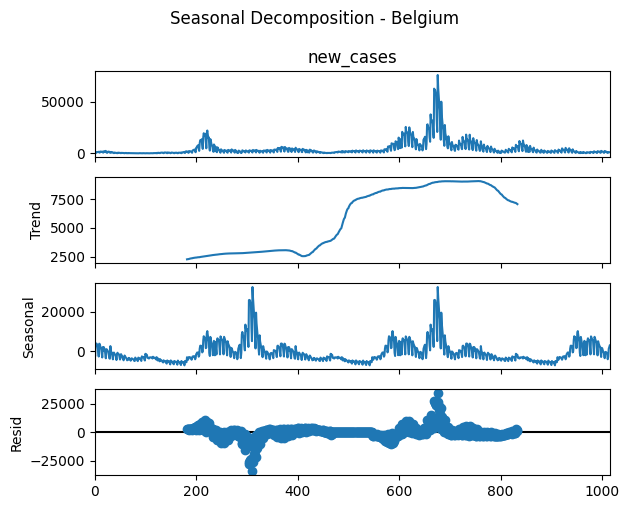

<Figure size 1000x600 with 0 Axes>

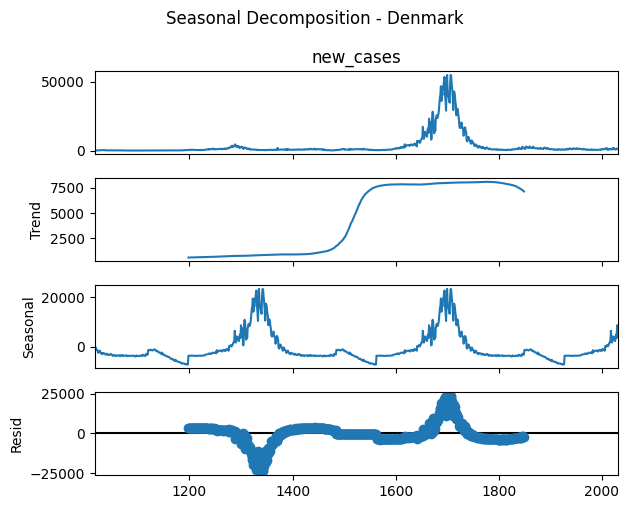

<Figure size 1000x600 with 0 Axes>

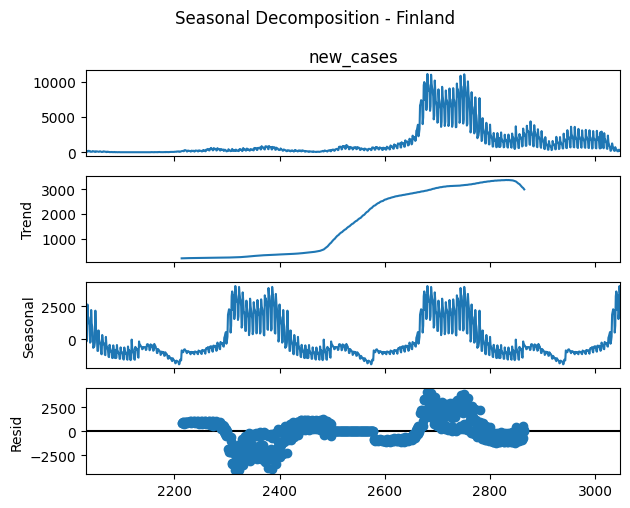

<Figure size 1000x600 with 0 Axes>

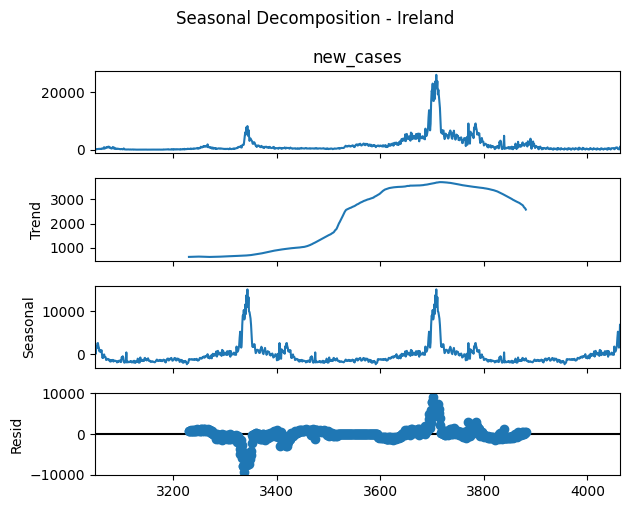

<Figure size 1000x600 with 0 Axes>

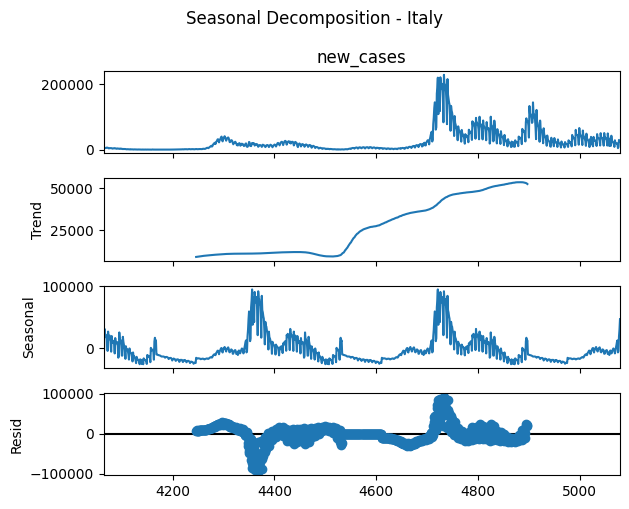

<Figure size 1000x600 with 0 Axes>

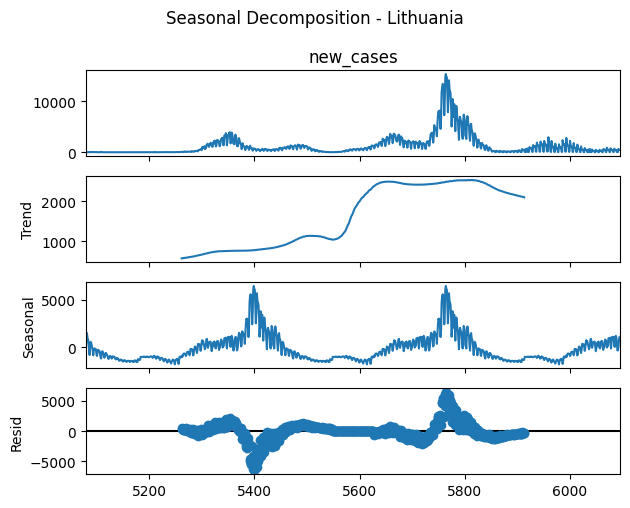

<Figure size 1000x600 with 0 Axes>

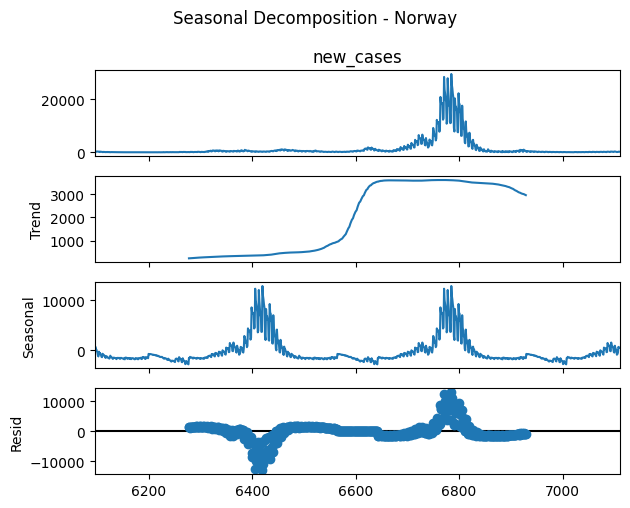

<Figure size 1000x600 with 0 Axes>

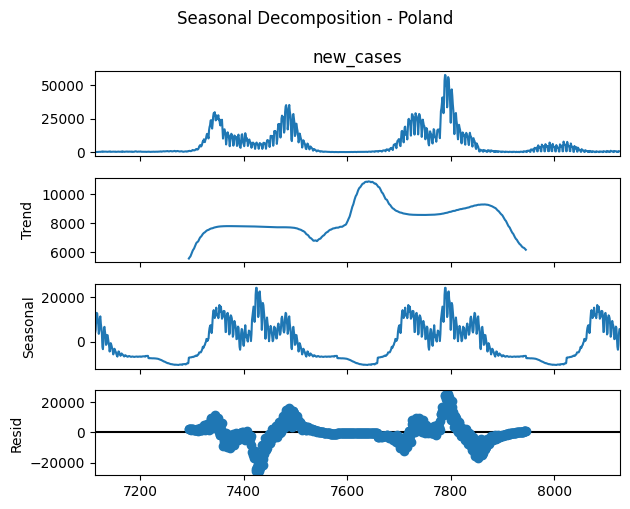

<Figure size 1000x600 with 0 Axes>

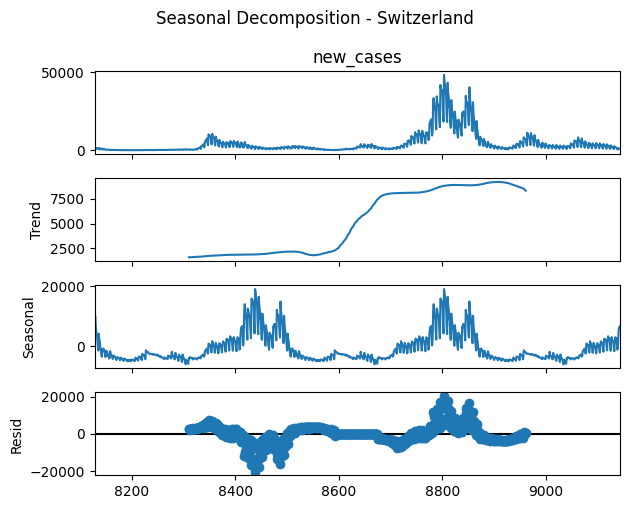

<Figure size 1000x600 with 0 Axes>

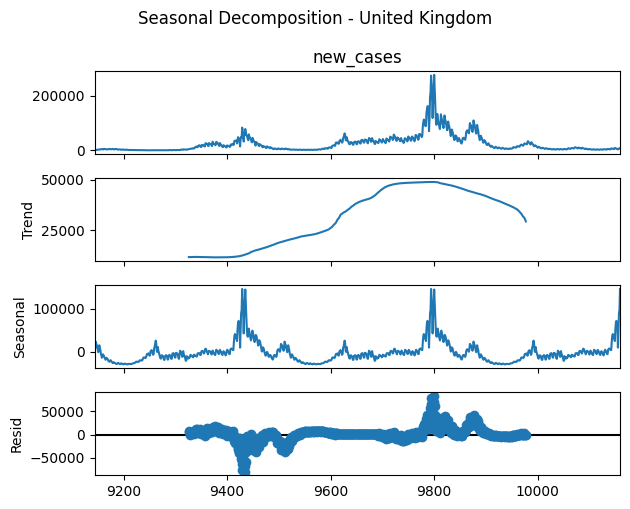

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


for country in train['location'].unique():
    country_data = train[train['location'] == country]
    result = seasonal_decompose(country_data['new_cases'], period=365)
    
    plt.figure(figsize=(10, 6))
    
    # Create plots
    result.plot()
    
    # Set the title with a higher y value to shift it up
    plt.suptitle(f'Seasonal Decomposition - {country}', y=1.05)
    
    # Save the figure with a lowercase country name
    plt.savefig('acf_plot_' + country.lower() + '.png')
    
    # Display the figure
    plt.show()



## Feature Creation

### Auto Correlation

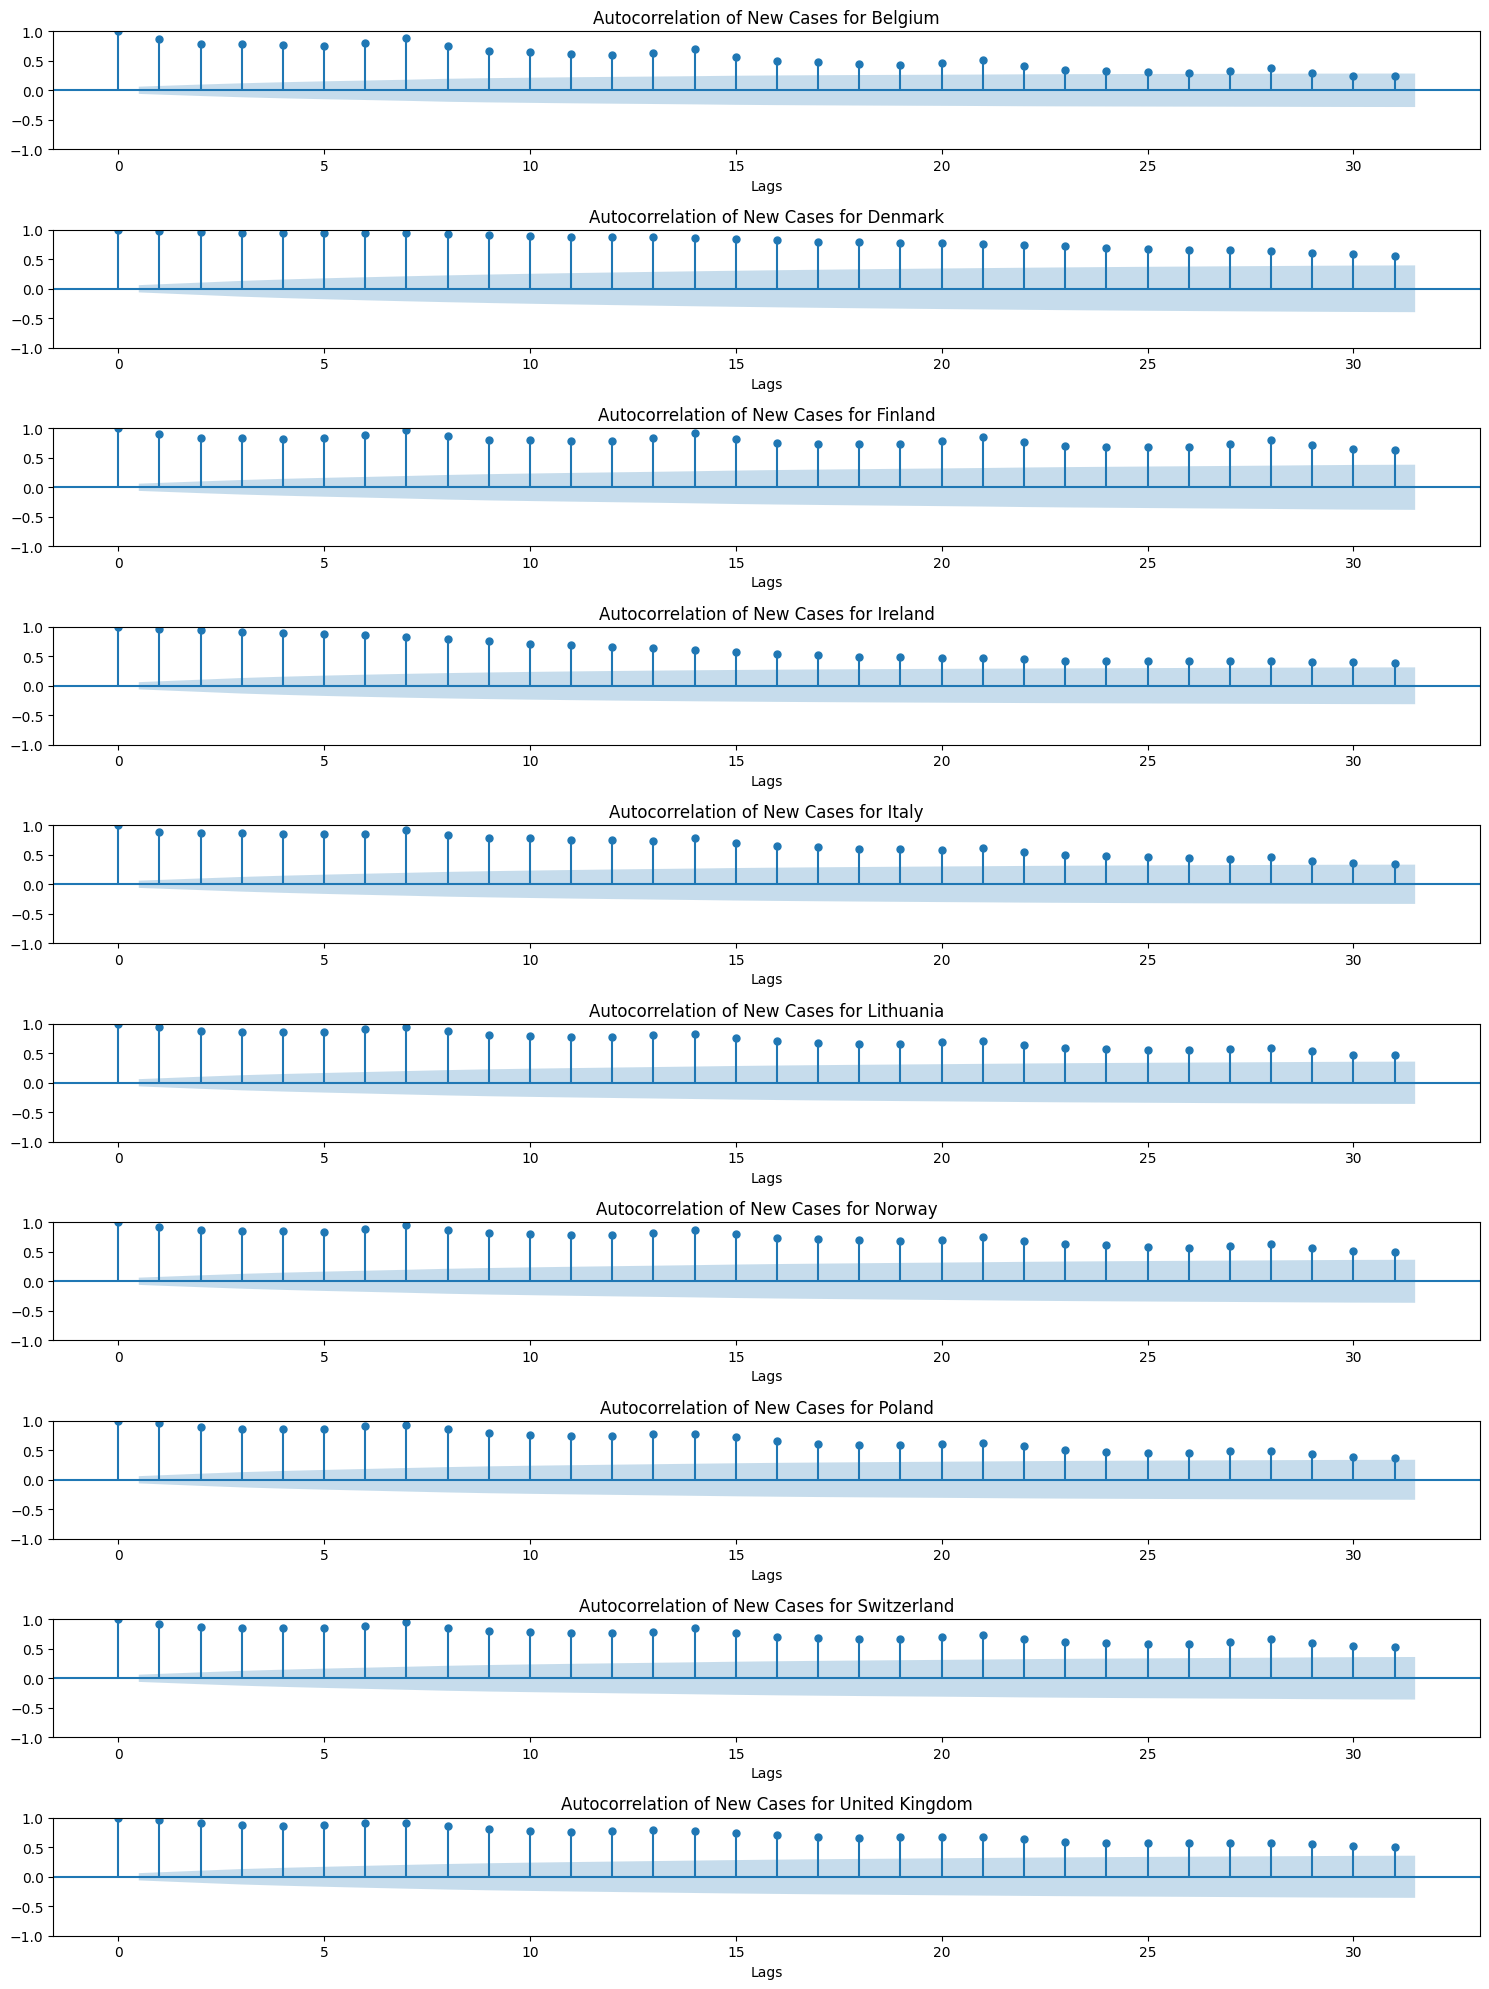

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import matplotlib.pyplot as plt

countries = train['location'].unique()

plt.figure(figsize=(15, 20))

for i, country in enumerate(countries, 1):
    plt.subplot(len(countries), 1, i)
    country_data = train[train['location'] == country]['new_cases']
    plot_acf(country_data.dropna(), alpha=0.05, ax=plt.gca())
    plt.title(f'Autocorrelation of New Cases for {country}')
    plt.xlabel('Lags')

plt.tight_layout()
plt.show()

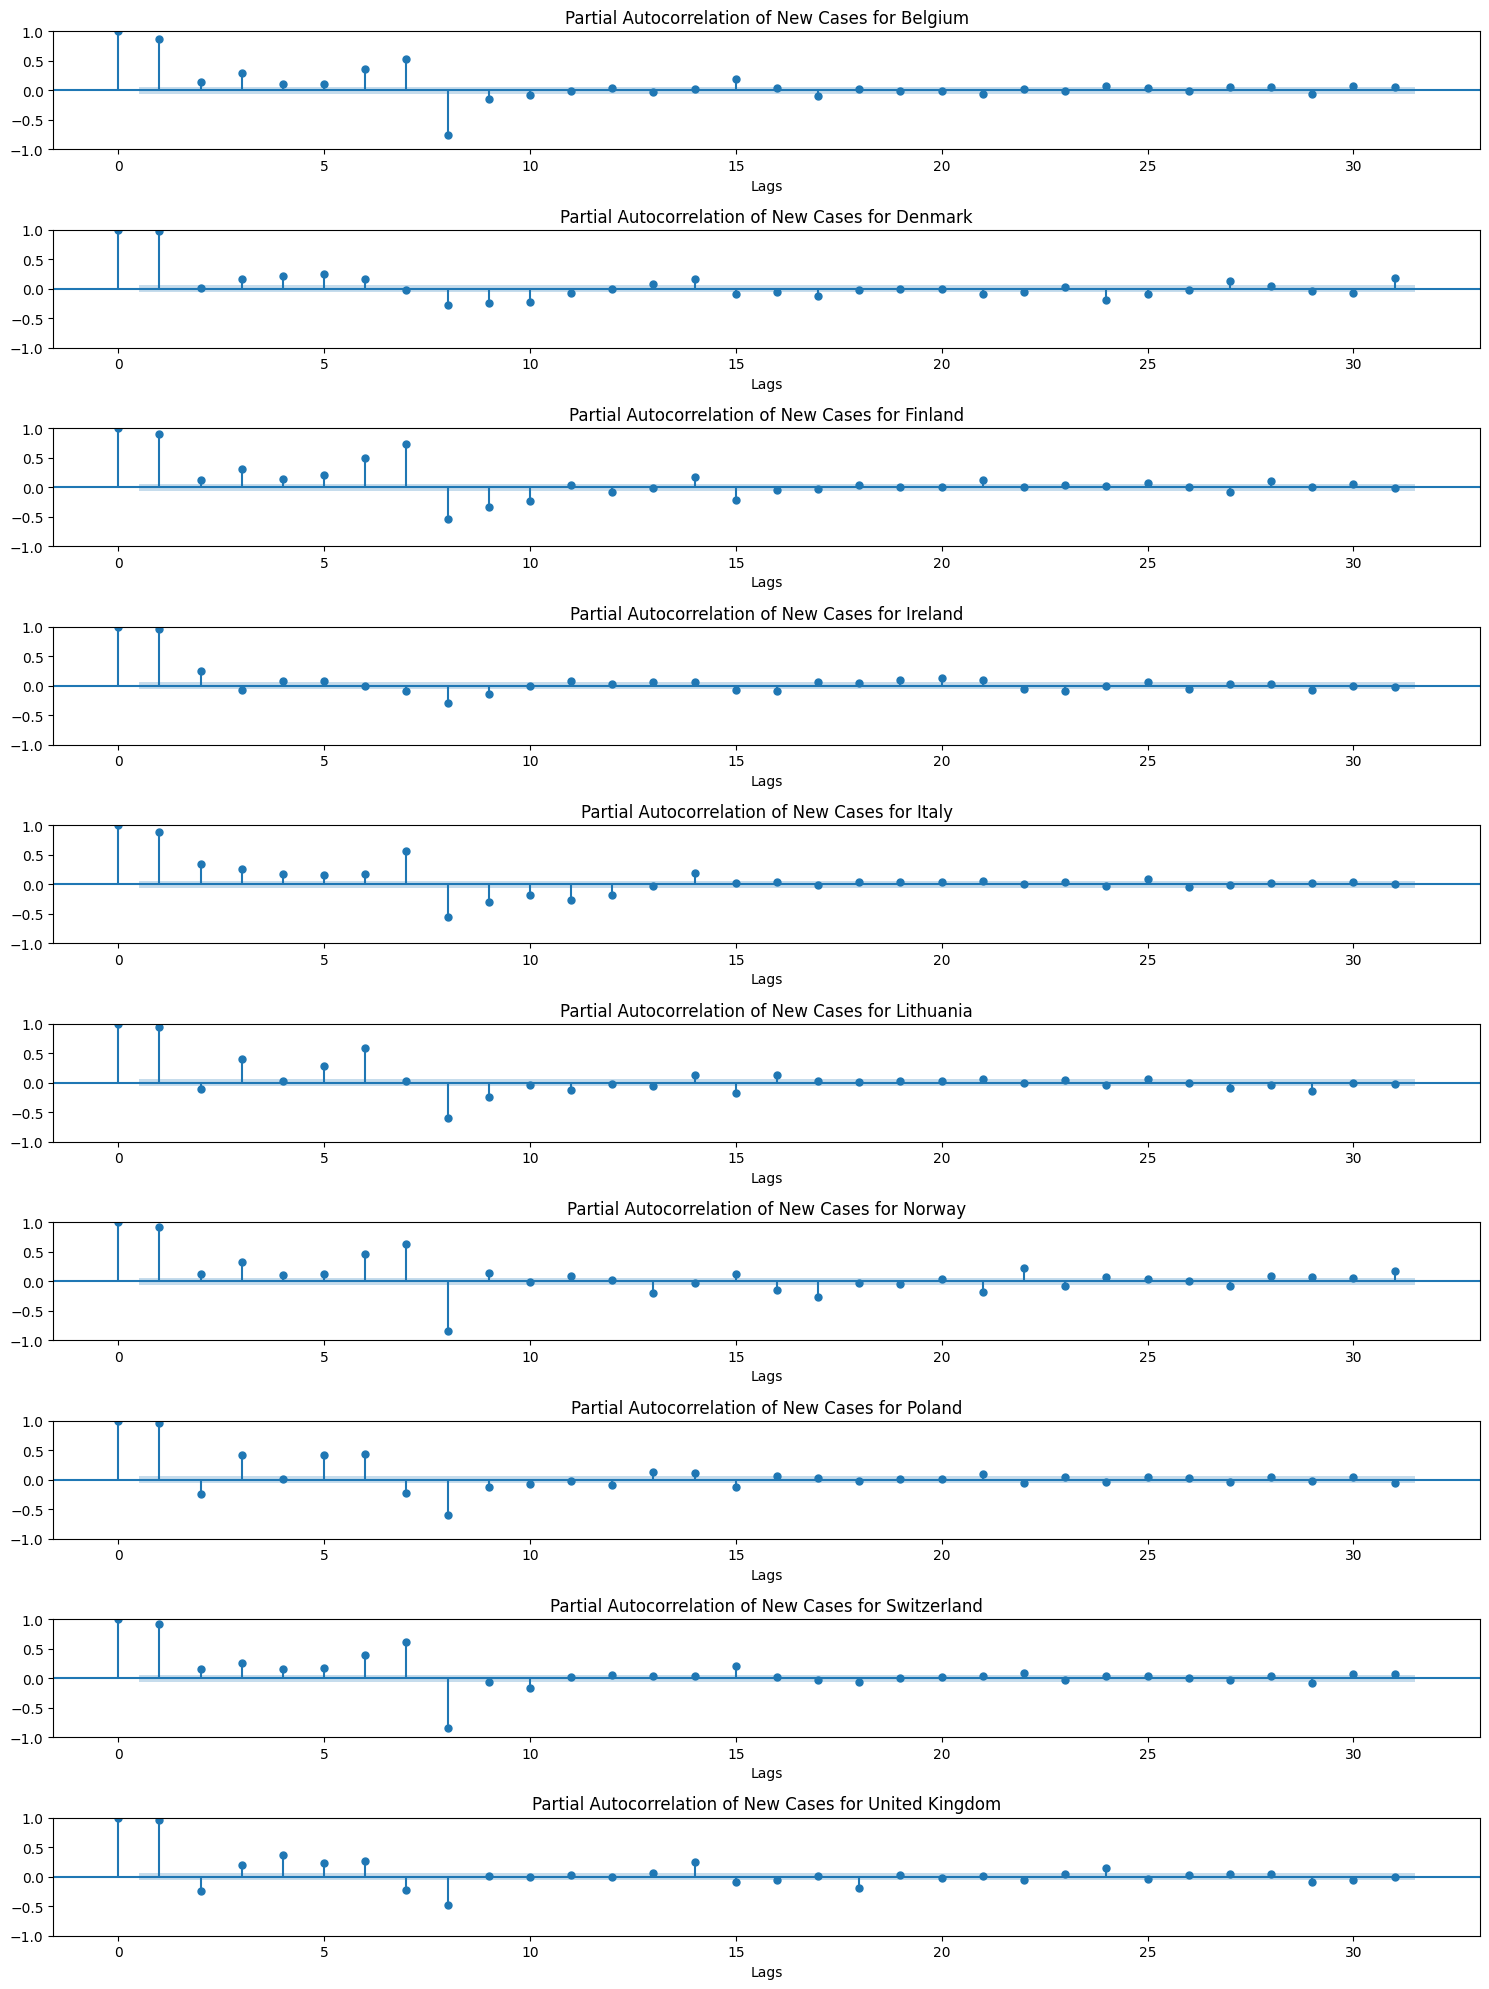

In [41]:
#pacf
plt.figure(figsize=(15, 20))

for i, country in enumerate(countries, 1):
    plt.subplot(len(countries), 1, i)
    country_data = train[train['location'] == country]['new_cases']
    plot_pacf(country_data.dropna(), alpha=0.05, ax=plt.gca())
    plt.title(f'Partial Autocorrelation of New Cases for {country}')
    plt.xlabel('Lags')

plt.tight_layout()
plt.show()

### Rolling and Lag Features

In [42]:
# lagged features with new_cases
for lag in [1, 7, 8]:
    train[f'new_cases_lag{lag}'] = train['new_cases'].shift(lag)
    test[f'new_cases_lag{lag}'] = test['new_cases'].shift(lag)

In [43]:
# rolling window 7-day and 14-day for new_cases
for window in [7, 14]:
    train[f'new_cases_roll_mean{window}'] = train['new_cases'].rolling(window=window).mean()
    train[f'new_cases_roll_std{window}'] = train['new_cases'].rolling(window=window).std()
    test[f'new_cases_roll_mean{window}'] = test['new_cases'].rolling(window=window).mean()
    test[f'new_cases_roll_std{window}'] = test['new_cases'].rolling(window=window).std()

In [44]:
print(f"Train Data Shape: {train.shape}")
print(f"Test Data Shape: {test.shape}")

Train Data Shape: (10160, 31)
Test Data Shape: (140, 31)


## EDA

### Univariate Analysis

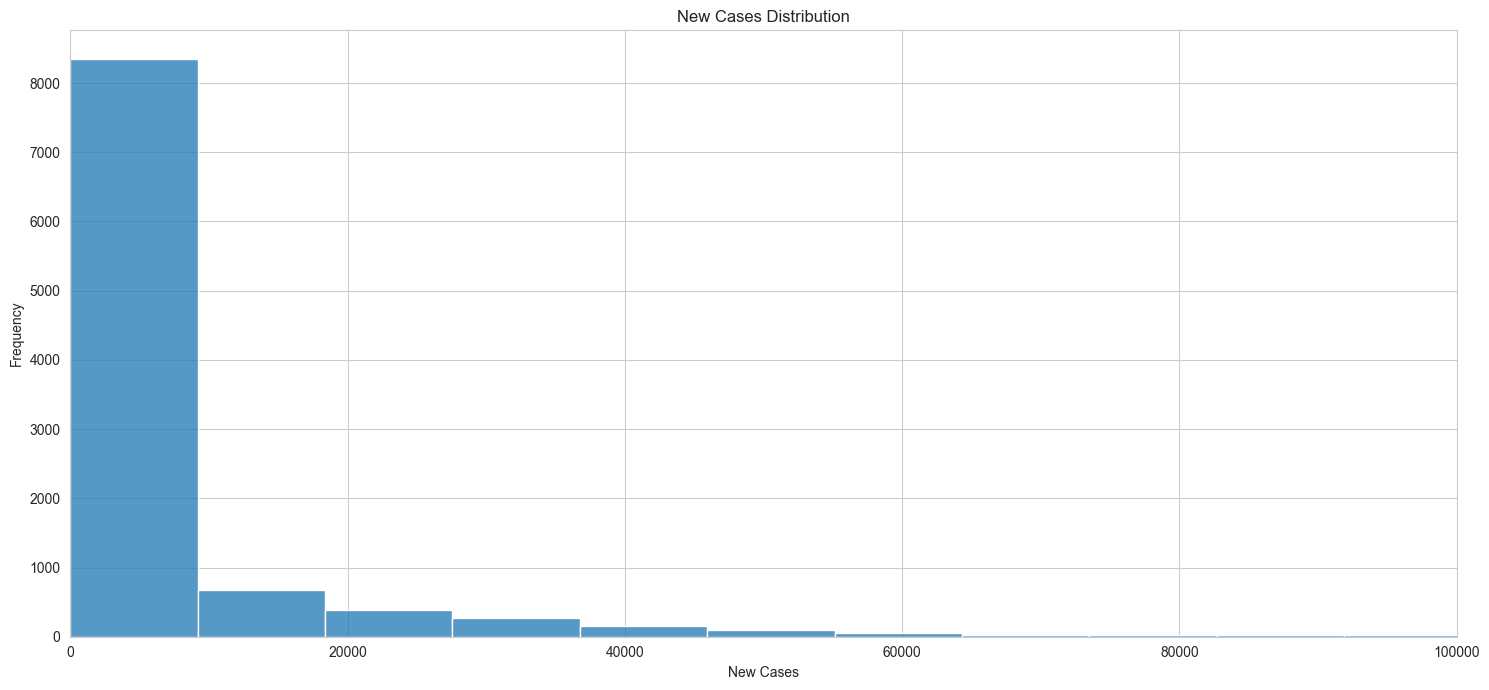

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

sns.histplot(train['new_cases'], kde=False, bins=30)
plt.title('New Cases Distribution')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.xlim(0, 100000)

plt.tight_layout()
plt.show()


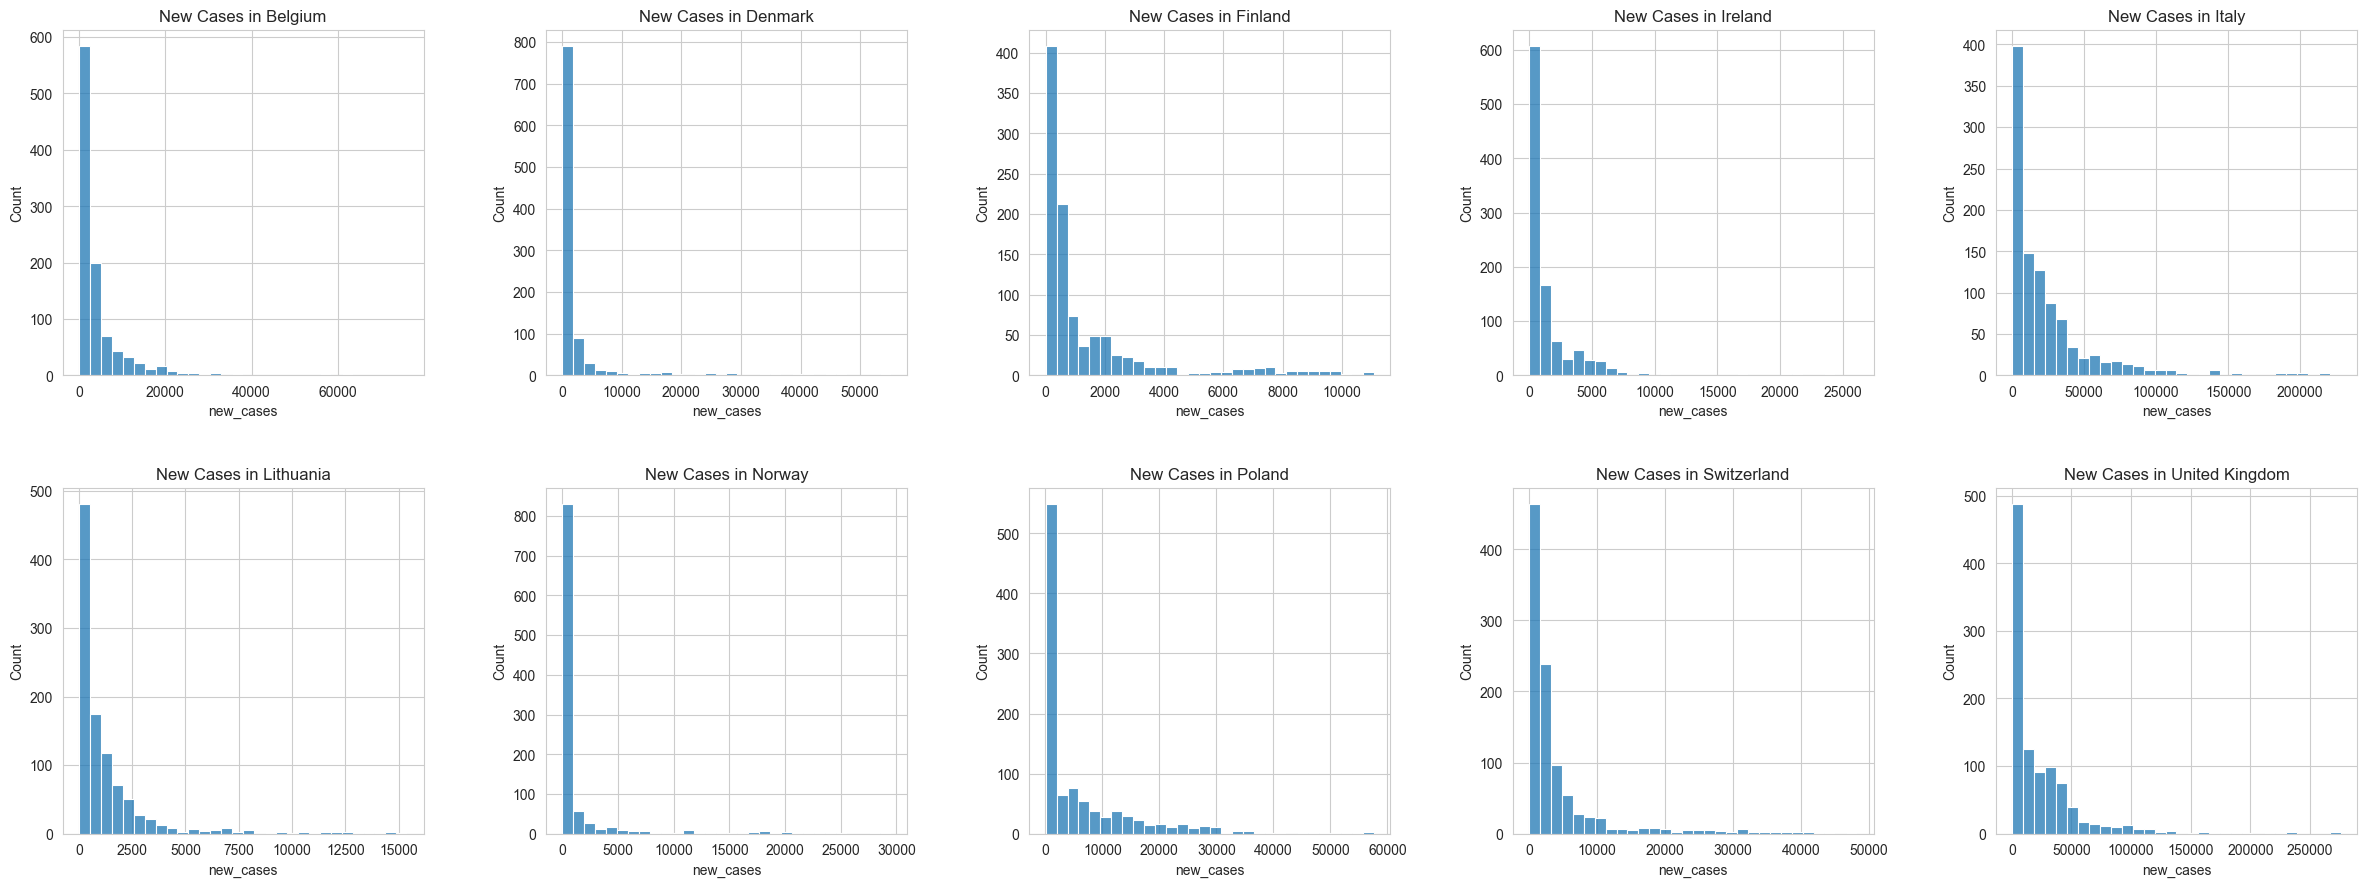

In [46]:
countries = train['location'].unique()
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10)) 
fig.tight_layout(pad=6.0)
for i, country in enumerate(countries):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    country_data = train[train['location'] == country]
    sns.histplot(country_data['new_cases'], kde=False, bins=30, ax=ax)
    ax.set_title(f'New Cases in {country}')
plt.show()

### Bivariate Analysis

In [47]:
continuous_variables = train.select_dtypes(include=[np.number]).columns 

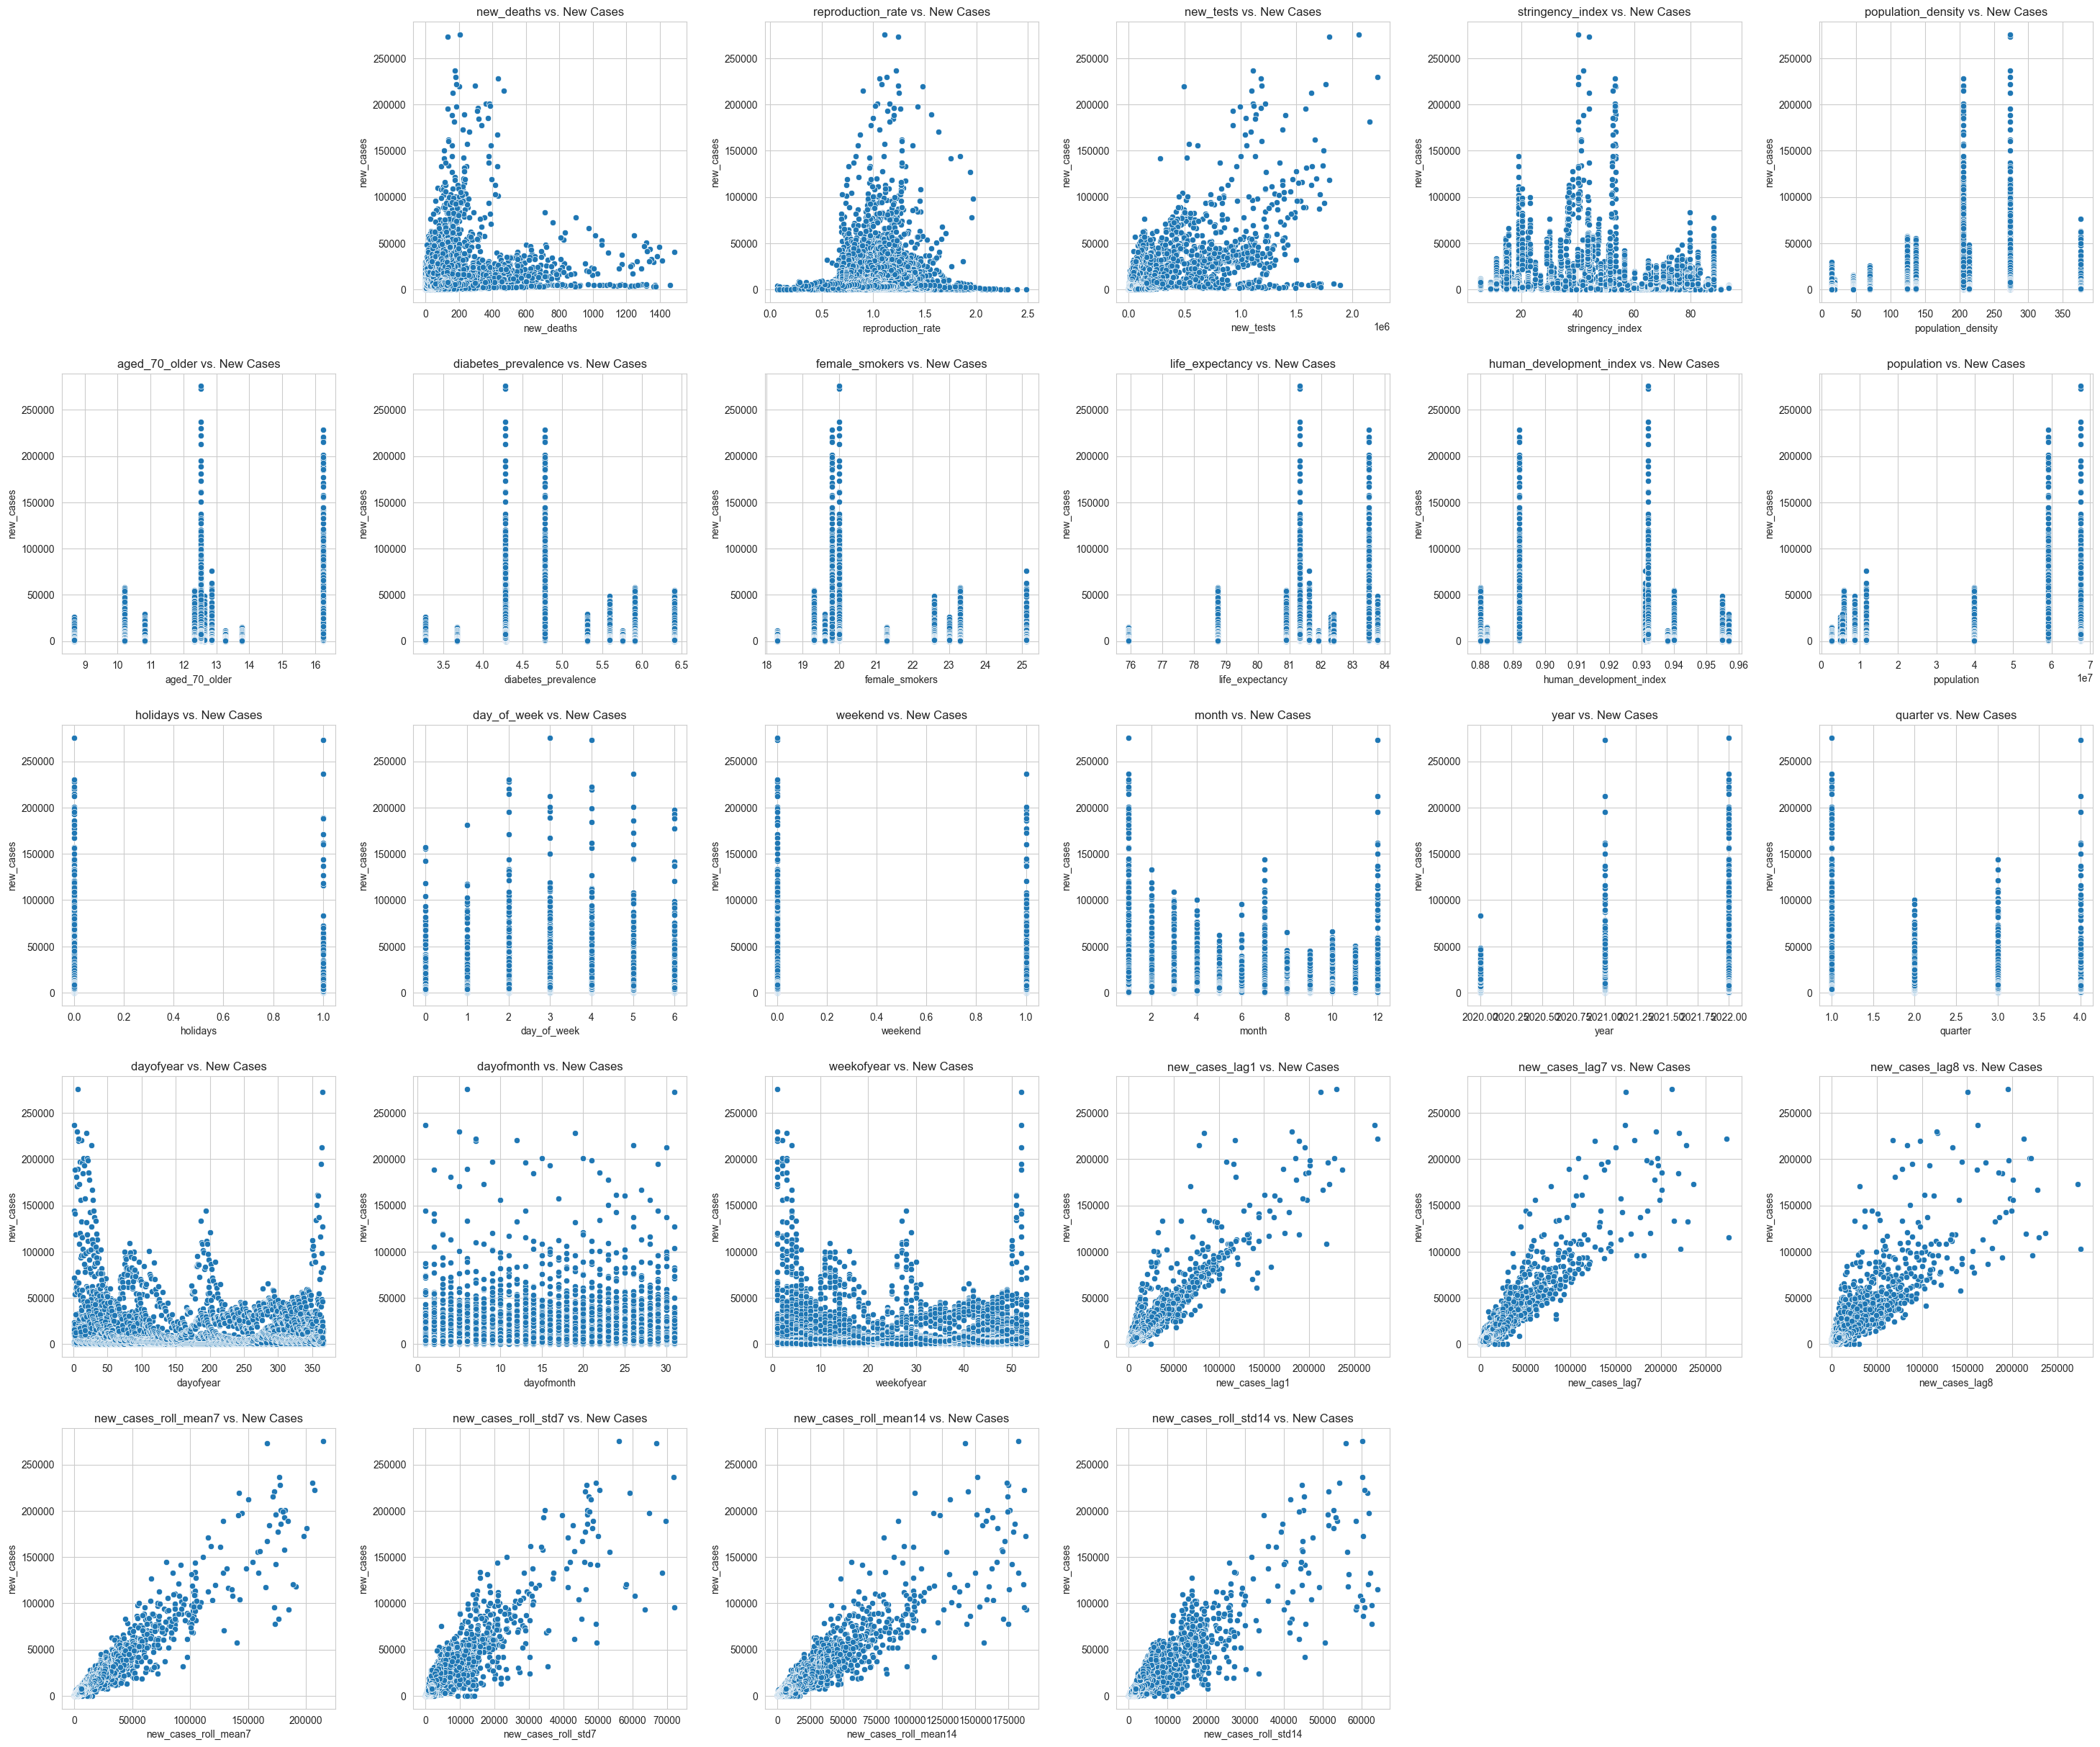

In [48]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 30)) 
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, var in enumerate(continuous_variables):
    if var != 'new_cases':  # Assuming you don't want to plot new_cases with itself
        sns.scatterplot(x=train[var], y=train['new_cases'], ax=axes[i])
        axes[i].set_title(f'{var} vs. New Cases')
    else:
        axes[i].set_visible(False)  # Hide the plot for new_cases vs. itself

# Remove any unused axes
for i in range(len(continuous_variables), 36):
    fig.delaxes(axes[i])

plt.show()


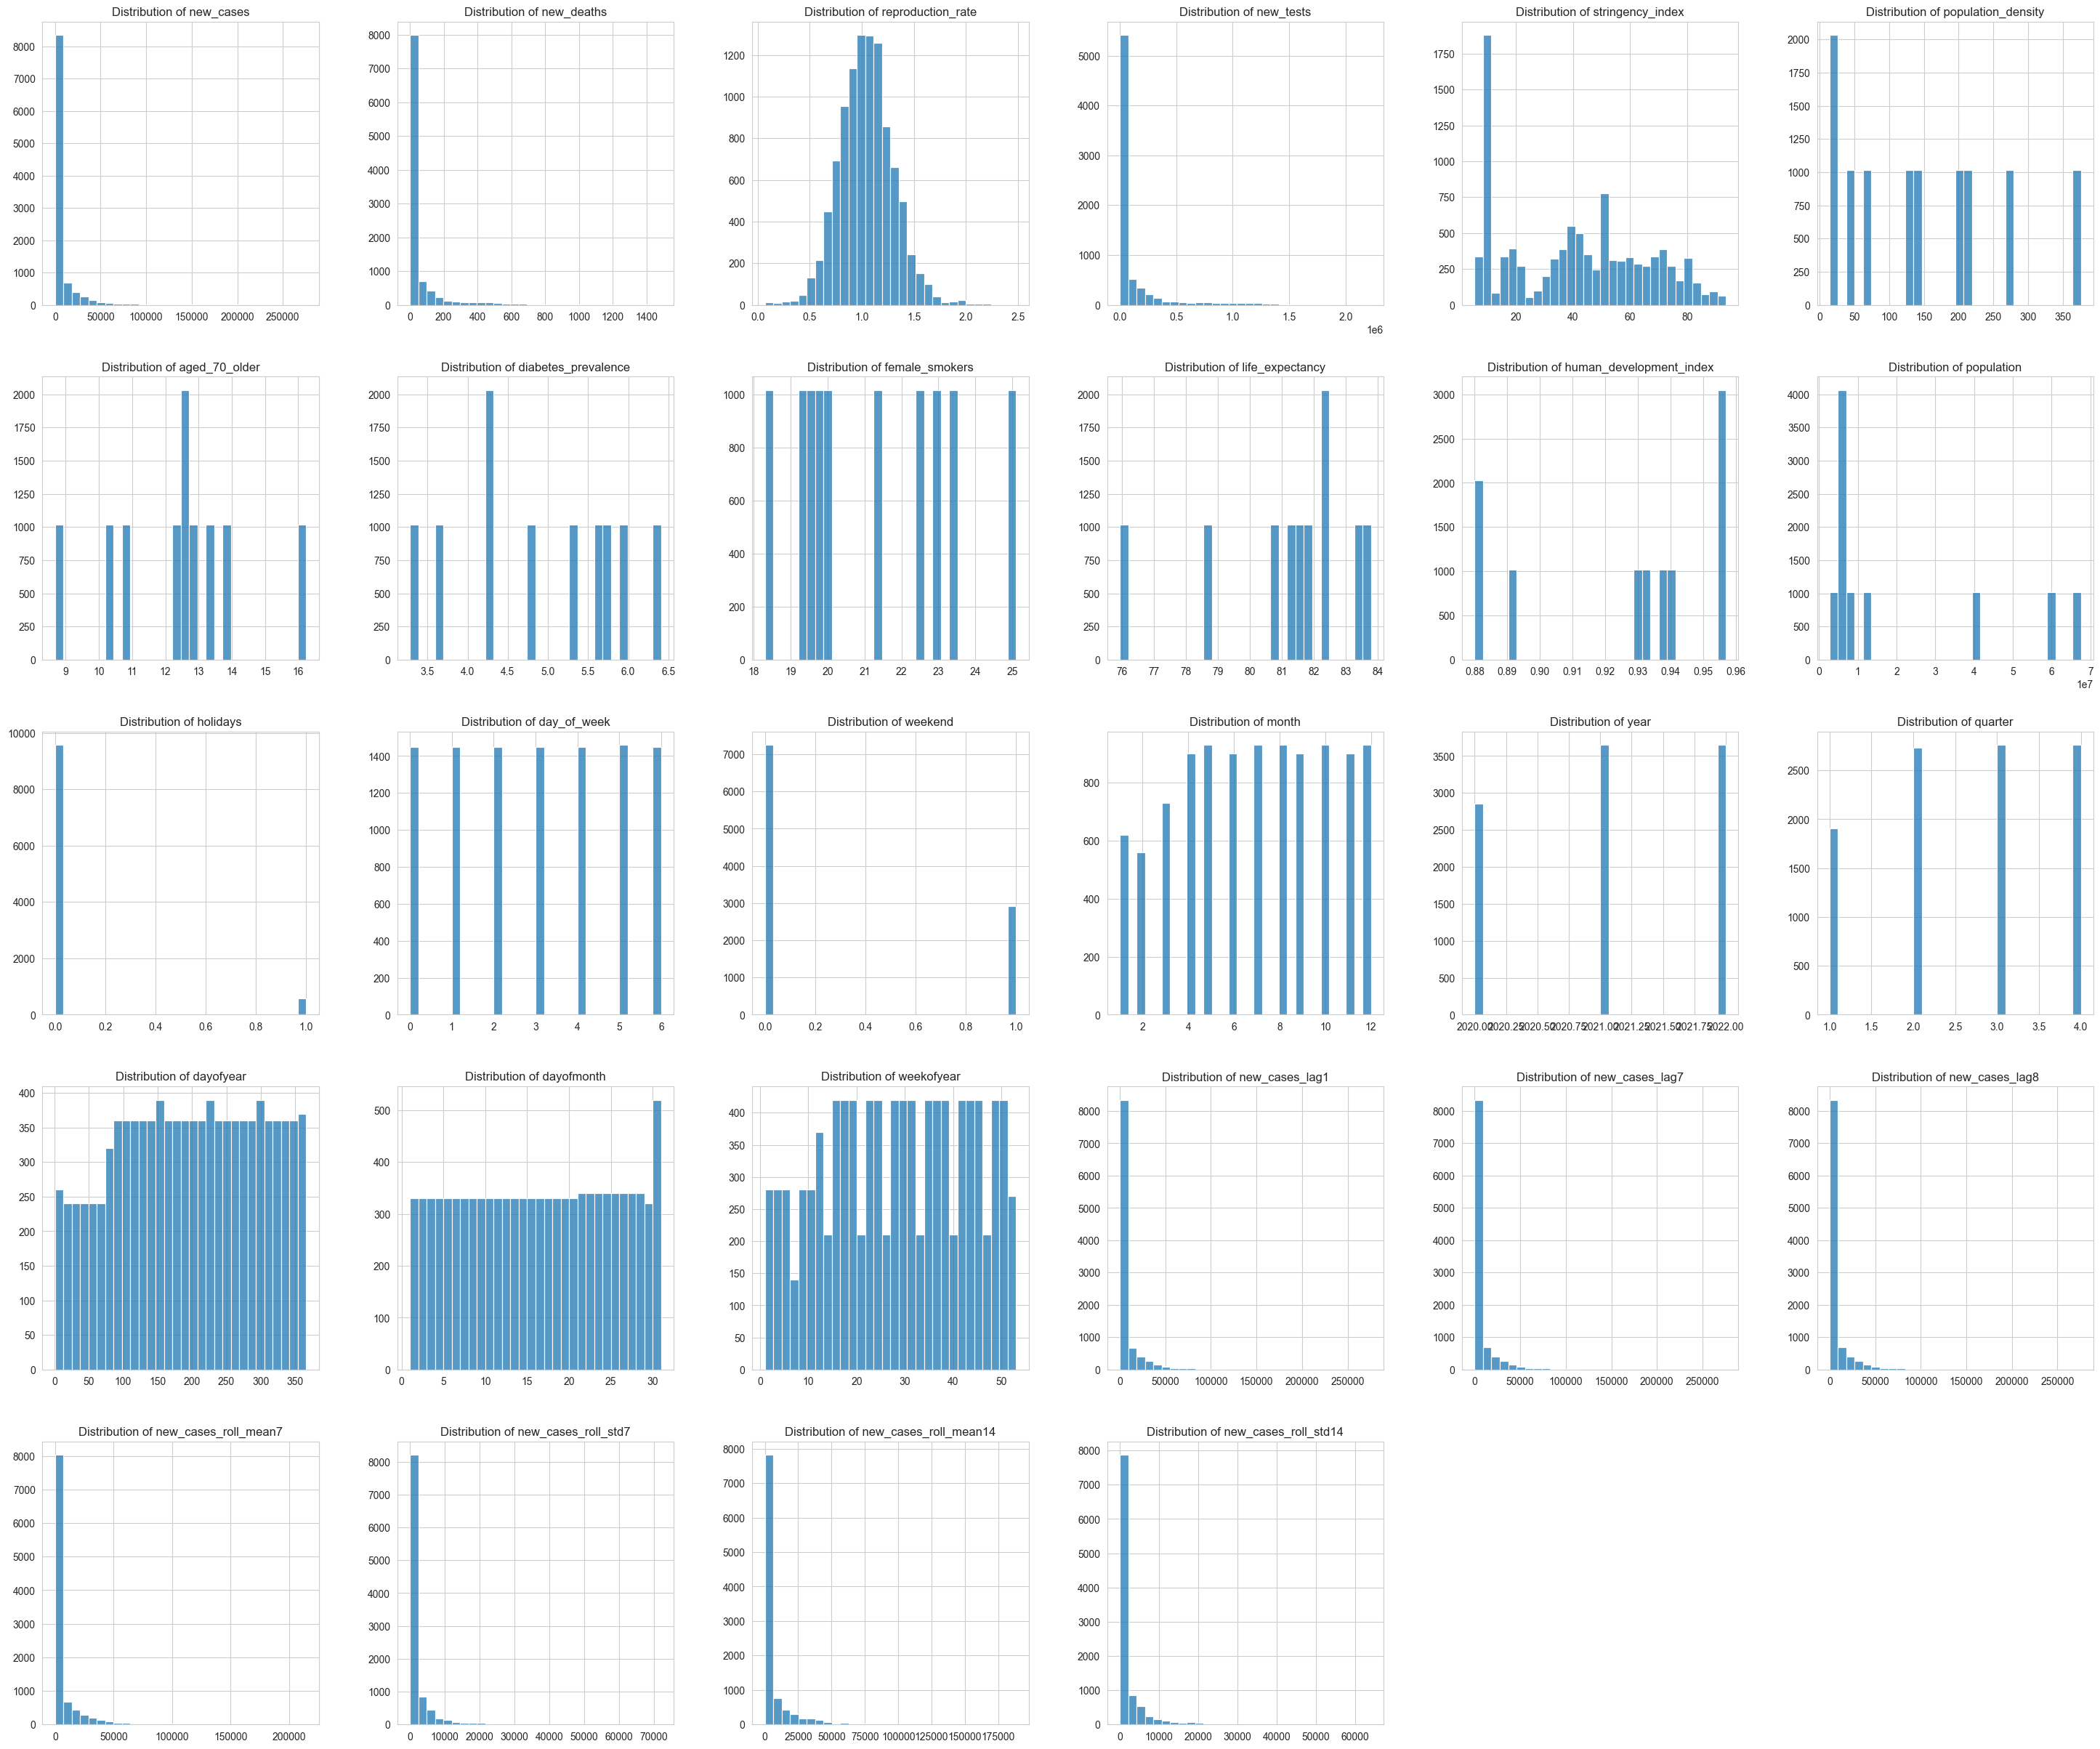

In [49]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 30)) 
fig.tight_layout(pad=5.0)
axes = axes.flatten()
for i, var in enumerate(continuous_variables):
    sns.histplot(train[var], kde=False, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for i in range(len(continuous_variables), 36):
    fig.delaxes(axes[i])
plt.show()

## Multivariate

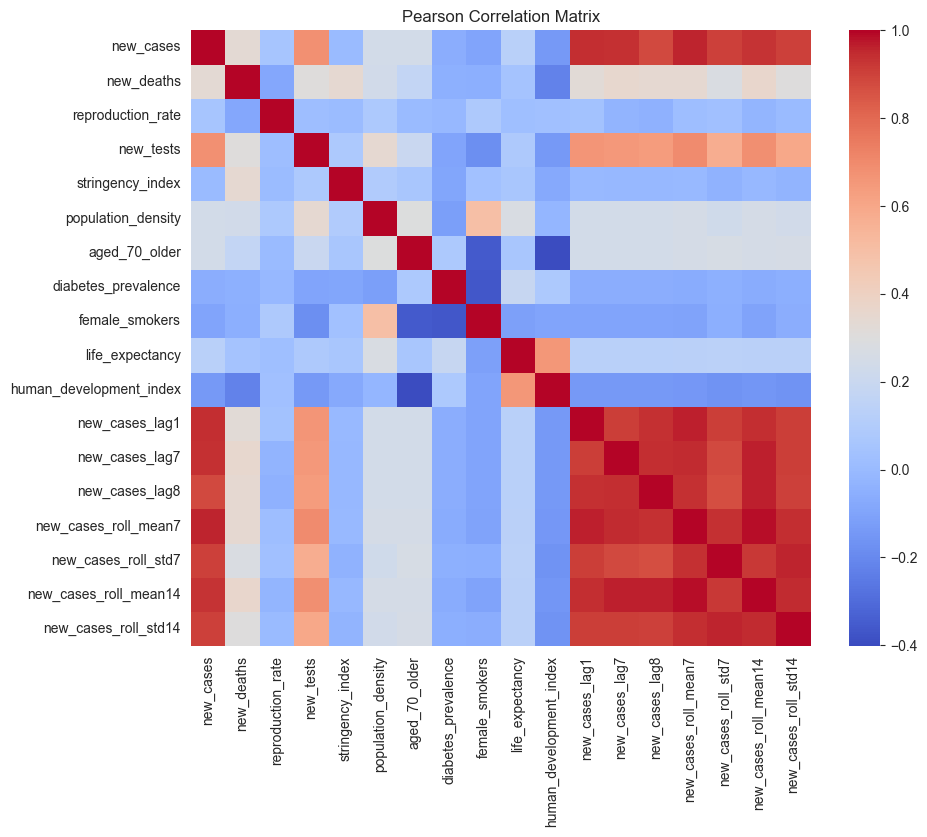

In [50]:
train_corr = train.select_dtypes(include=['float64'])
pearson_corr = train_corr.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

## Preparing data clean

In [51]:
## Dealing with missing values regressors
missing_values_by_location = train.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
missing_values_df.to_csv('missing_values_train.csv')

There were five missing values in reproduction_rate for Lithuania. Poland did not have data for new_tests; other countries are missing ~20% data for new_tests. 

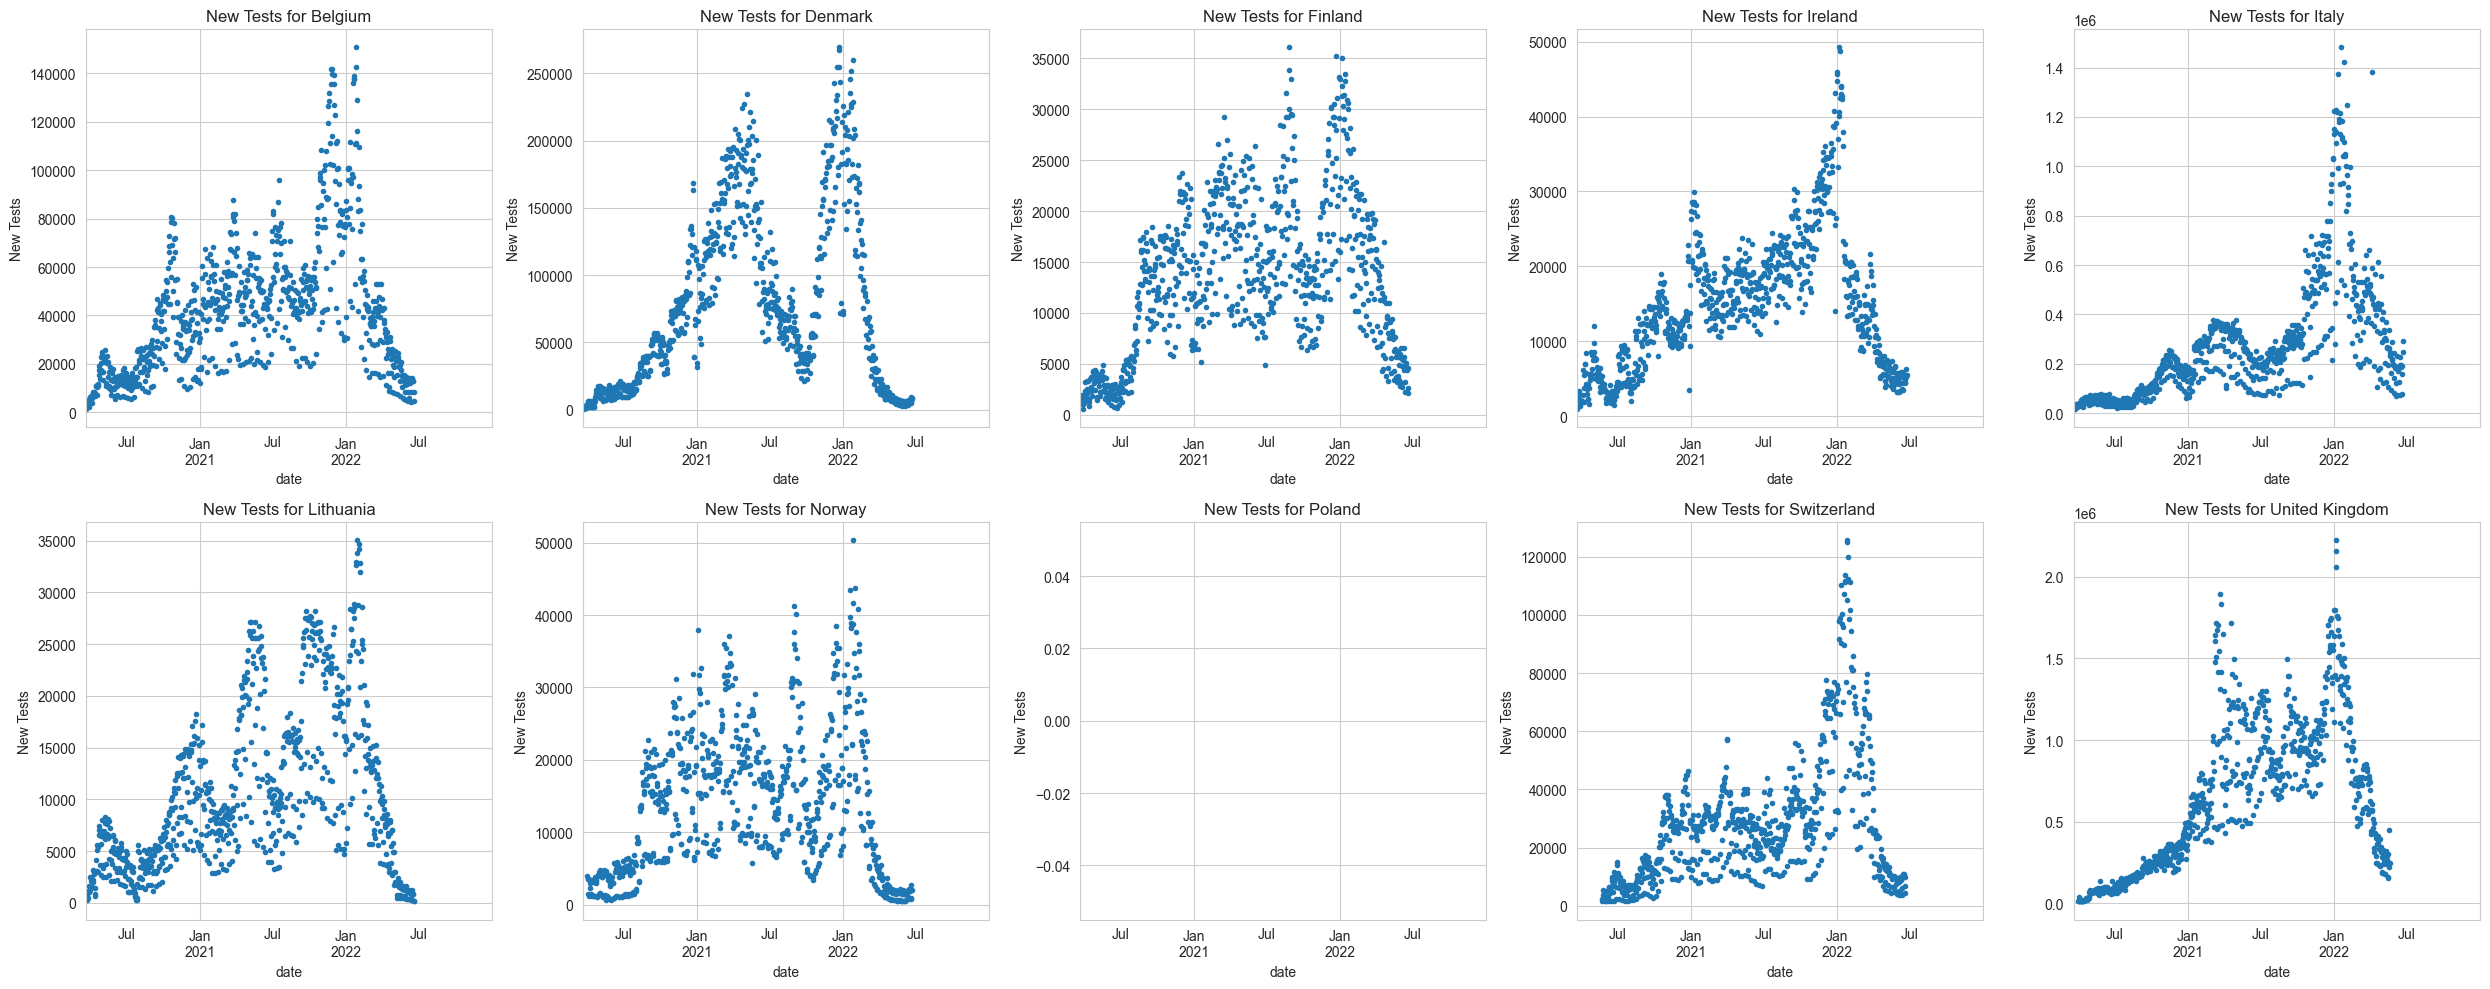

In [52]:
train_visual = train.copy()
train_visual.set_index('date', inplace=True)
train_visual.sort_index(inplace=True)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10)) 
fig.tight_layout(pad=6.0)

for i, country in enumerate(countries):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    train_visual[train_visual['location'] == country]['new_tests'].plot(ax=ax, style='.', title=f'New Tests for {country}')
    ax.set_ylabel('New Tests')

plt.tight_layout()
plt.show()

In [53]:
train2 = train.copy()

In [54]:
# Fill missing 'reproduction_rate' for Lithuania with 0
train['reproduction_rate'] = train['reproduction_rate'].fillna(0)

# Impute new_tests using ffill 
locations = train['location'].unique()
for location in locations:
    location_data = train[train['location'] == location]

    if location == 'Poland':
        train.loc[train['location'] == 'Poland', 'new_tests'] = train.loc[train['location'] == 'Poland', 'new_tests'].fillna(0)
    else:
        train.loc[train['location'] == location, 'new_tests'] = location_data['new_tests'].fillna(method='ffill')

train = train.fillna(0)

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_65403/2535279246.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.loc[train['location'] == location, 'new_tests'] = location_data['new_tests'].fillna(method='ffill')


In [55]:
# # impute first values of lag and moving averages with zero and then use ffill
# columns_to_fill = ['new_cases_lag1', 'new_cases_lag7', 'new_cases_lag8', 
#                    'new_cases_roll_mean7', 'new_cases_roll_std7', 
#                    'new_cases_roll_mean14', 'new_cases_roll_std14']
# locations = train2['location'].unique()
# for location in locations:
#     # country_data = train2[train2['location'] == location]
#     for column in columns_to_fill:
#         loc_column_data = train2.loc[train2['location'] == location, column]
#         first_missing_index = loc_column_data[loc_column_data.isna()].index.min()
#         train2.loc[first_missing_index, column] = 0
#         # country_data.loc[country_data['location'] == location, column].fillna(method='ffill', inplace=True)
#         train2.loc[train2['location'] == location, column] = loc_column_data.fillna(method='ffill')
train = train.fillna(0)

In [56]:
print(train.isnull().sum())

date                       0
location                   0
new_cases                  0
new_deaths                 0
reproduction_rate          0
new_tests                  0
stringency_index           0
population_density         0
aged_70_older              0
diabetes_prevalence        0
female_smokers             0
life_expectancy            0
human_development_index    0
population                 0
holidays                   0
season                     0
day_of_week                0
weekend                    0
month                      0
year                       0
quarter                    0
dayofyear                  0
dayofmonth                 0
weekofyear                 0
new_cases_lag1             0
new_cases_lag7             0
new_cases_lag8             0
new_cases_roll_mean7       0
new_cases_roll_std7        0
new_cases_roll_mean14      0
new_cases_roll_std14       0
dtype: int64


In [57]:
# same for test
test['reproduction_rate'] = test['reproduction_rate'].fillna(0)
# Impute new_tests using ffill 
locations = test['location'].unique()
for location in locations:
    location_data = test[test['location'] == location]
    if location == 'Poland':
        test.loc[test['location'] == 'Poland', 'new_tests'] = test.loc[test['location'] == 'Poland', 'new_tests'].fillna(0)
    else:
        test.loc[train['location'] == location, 'new_tests'] = location_data['new_tests'].fillna(method='ffill')
test = test.fillna(0)

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_65403/630666841.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.loc[train['location'] == location, 'new_tests'] = location_data['new_tests'].fillna(method='ffill')
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_65403/630666841.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.loc[train['location'] == location, 'new_tests'] = location_data['new_tests'].fillna(method='ffill')
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_65403/630666841.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.loc[train['location'] == location, 'new_tests'] = location_data['new_tests'].fillna(method='ffill')
/var/folders/n4/3g40sf9n163fj3t1fb

In [58]:
data_clean = pd.concat([train, test])
data_clean = data_clean.sort_values(by=['location', 'date'])
data_clean.head()

date location  new_cases  new_deaths  reproduction_rate  new_tests  \
0 2020-03-21  Belgium      713.0        35.0               2.16     2276.0   
1 2020-03-22  Belgium      662.0        40.0               2.13     1414.0   
2 2020-03-23  Belgium      469.0        41.0               2.09     3322.0   
3 2020-03-24  Belgium      486.0        55.0               2.05     3975.0   
4 2020-03-25  Belgium     1328.0        81.0               2.01     4282.0   

   stringency_index  population_density  aged_70_older  diabetes_prevalence  \
0             81.48             375.564         12.849                 4.29   
1             81.48             375.564         12.849                 4.29   
2             81.48             375.564         12.849                 4.29   
3             81.48             375.564         12.849                 4.29   
4             81.48             375.564         12.849                 4.29   

   ...  dayofyear  dayofmonth  weekofyear  new_cases_lag1  new_cases_lag7  \
0  ...         81          21          12             0.0             0.0   
1  ...         82          22          12           713.0             0.0   
2  ...         83          23          13           662.0             0.0   
3  ...         84          24          13           469.0             0.0   
4  ...         85          25          13           486.0             0.0   

  new_cases_lag8  new_cases_roll_mean7  new_cases_roll_std7  \
0            0.0                   0.0                  0.0   
1            0.0                   0.0                  0.0   
2            0.0                   0.0                  0.0   
3            0.0                   0.0                  0.0   
4            0.0                   0.0                  0.0   

   new_cases_roll_mean14  new_cases_roll_std14  
0                    0.0                   0.0  
1                    0.0                   0.0  
2                    0.0                   0.0  
3                    0.0                   0.0  
4                    0.0                   0.0  

[5 rows x 31 columns]

In [59]:
data_clean.to_csv('data_clean.csv')
train.to_csv('train.csv')
test.to_csv('test.csv')

In [60]:
# # encode location 
# train = pd.get_dummies(train, columns=['location'])
# test = pd.get_dummies(test, columns=['location'])

# # encode holidays and season
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train['holidays'] = le.fit_transform(train['holidays'])
# test['holidays'] = le.transform(test['holidays'])
# train['season'] = le.fit_transform(train['season'])
# test['season'] = le.transform(test['season'])